# PROYECTO DE GRADO MAESTRÍA EN ANALÍTICA PARA LA INTELIGENCIA DE NEGOCIOS
INTEGRANTES:
- Laura Diaz
- Eduardo Ruge
- Julián Cujabante V

### Librerias que necesitan ser instaladas previamente

In [ ]:
!pip install imbalanced_learn
!pip install shap
!pip install --upgrade kneed
!pip install gower
!pip install kmodes
!pip install xgboost
!pip install lightgbm

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509255 sha256=272f0b99cc9d3cbbfdc84777f976b9dc7672a3cff1dda8aa5b5b1c52bda553b4
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=de357f356434a377d6cacde88bce495a4c9eab1a7283b5b5cd4f3335639231dc
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


##**LIBRERIAS Y PAQUETES**

In [ ]:
import pandas as pd
import os
import sys
import use_root
import root
import numpy as np
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import shap
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, Normalizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import gower
from sklearn.cluster import DBSCAN
from kmodes.kprototypes import KPrototypes

In [ ]:
sns.set(style='darkgrid')

In [ ]:
print(root.DIR_DATA)

In [ ]:
#Path datos en repositorio
path=root.DIR_DATA
path2=path+'Consolidados'

In [ ]:
file_name='consolida_final_def.csv'

In [ ]:
data=pd.read_csv(os.path.join(path2, file_name), sep=';', index_col=0)
data.head()

Columns (2,14) have mixed types.Specify dtype option on import or set low_memory=False.


tipo_id   cedula  ... ANIO_SABERPRO punt_global_prom_s11
0      CE   303774  ...           NaN                 -1.0
1      CE   572419  ...           NaN                 -1.0
2      CE   742051  ...           NaN                 -1.0
3      CC  2235226  ...           NaN                 -1.0
4      CC  2236688  ...           NaN                 -1.0

[5 rows x 170 columns]

In [ ]:
data.shape

(15744, 170)

In [ ]:
data_sup= data[['punt_global_saberpro','punt_global_of', 'punt_global_prep',
                  'promedio_andina', 'cantidad_preparatorios', 'cantidad_oficiales', 'punt_global_prom_s11']]
print(data_sup.shape)

(15744, 7)
(15744, 13)


#**SUPERVISED LEARNING**

In [ ]:
data_sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15744 entries, 0 to 15743
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   punt_global_saberpro    15744 non-null  float64
 1   punt_global_of          15744 non-null  float64
 2   punt_global_prep        15744 non-null  float64
 3   promedio_andina         15744 non-null  float64
 4   cantidad_preparatorios  7288 non-null   float64
 5   cantidad_oficiales      10801 non-null  float64
 6   punt_global_prom_s11    15744 non-null  float64
dtypes: float64(7)
memory usage: 984.0 KB


Se realiza un filtro de las siguientes variables

In [ ]:
data_sup=data_sup.query(' punt_global_saberpro>0 & punt_global_of>10 & punt_global_prep>10 & promedio_andina>2 & cantidad_preparatorios>0 & cantidad_oficiales>0 & punt_global_prom_s11>1')

In [ ]:
data_sup.shape

(1885, 7)

In [ ]:
data_sup.isnull().sum()

punt_global_saberpro      0
punt_global_of            0
punt_global_prep          0
promedio_andina           0
cantidad_preparatorios    0
cantidad_oficiales        0
punt_global_prom_s11      0
dtype: int64

In [ ]:
data_sup.describe().T

count        mean        std  ...    50%    75%    max
punt_global_saberpro    1885.0  142.874271  19.234104  ...  143.0  156.0  220.0
punt_global_of          1885.0  131.284615  47.644600  ...  131.4  161.3  288.6
punt_global_prep        1885.0  131.160743  53.255658  ...  134.1  167.5  290.9
promedio_andina         1885.0    4.123714   0.332885  ...    4.1    4.4    5.0
cantidad_preparatorios  1885.0    1.529443   0.753483  ...    1.0    2.0    4.0
cantidad_oficiales      1885.0    1.055703   0.231710  ...    1.0    1.0    3.0
punt_global_prom_s11    1885.0  257.819363  36.108201  ...  255.0  283.0  428.0

[7 rows x 8 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7abe7211d0>,
      dtype=object)

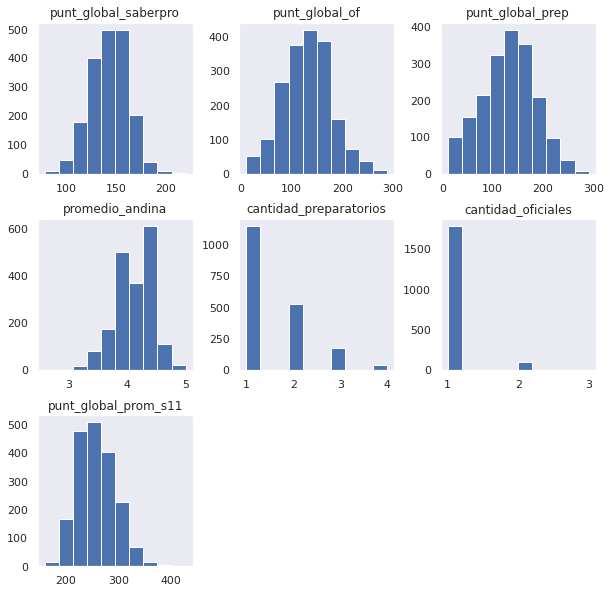

In [ ]:
data_sup.hist(grid=False, figsize=(10,10))

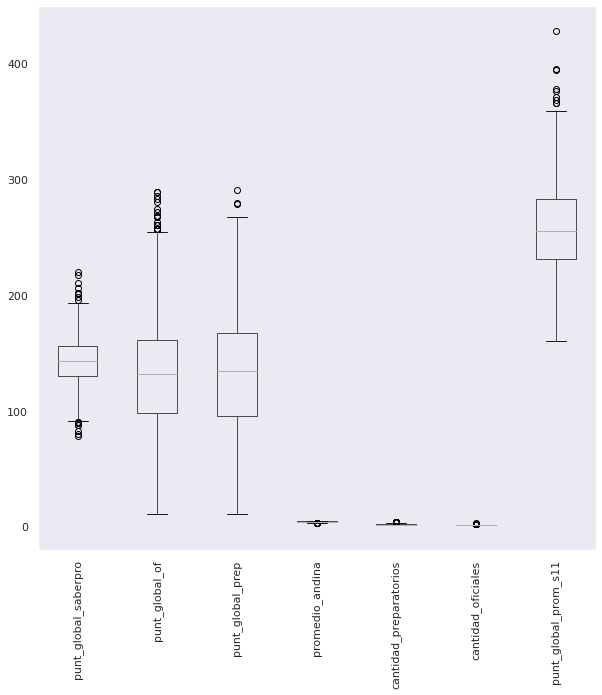

In [ ]:
data_sup.boxplot(grid=False, figsize=(10,10), rot=90)

In [ ]:
data_sup['y']=np.where(data_sup['punt_global_saberpro']>150,1,0)

In [ ]:
data_sup=data_sup.astype({'y':'category'})

      y  porcentaje
0  1208    0.640849
1   677    0.359151


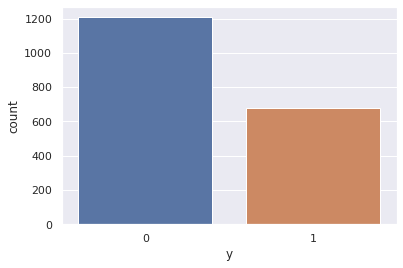

In [ ]:
y_counts=data_sup['y'].value_counts().to_frame('y')
y_counts['porcentaje']=y_counts['y']/y_counts['y'].sum()
print(y_counts)
sns.countplot(x='y', data=data_sup)

In [ ]:
data_sup_list=['punt_global_of', 'punt_global_prep',
                  'promedio_andina', 'cantidad_preparatorios', 'cantidad_oficiales', 'punt_global_prom_s11']

In [ ]:
y=data_sup['y'].values
X=data_sup[data_sup_list]

##### Partición en train y test

In [ ]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1319, 6), (566, 6), (1319,), (566,))

Se definen métricas de clasificación a ser usadas

In [ ]:
# Curva ROC
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Matriz de Confusión: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [ ]:
class_threshold=0.5

## MODELOS SUPERVISADOS

## Naive Bayes

Modelo Naive Bayes: 

Matriz de Confusión: 
[[309  62]
 [ 67 128]]
                                   Accuracy: 0.7720848056537103
                       SENSITIVITY (RECALL): 0.6564102564102564
                     SPECIFICITY (FALL-OUT): 0.8328840970350404
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6736842105263158
                  NEGATIVE PREDICTIVE VALUE: 0.8218085106382979
                                   F1 SCORE: 0.6649350649350649


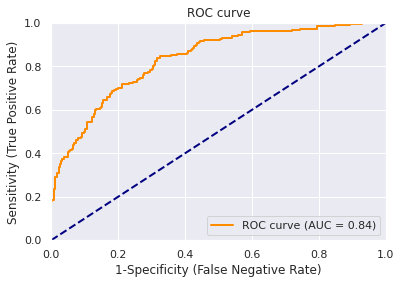

 AUC: 0.8353445296841522


In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train, y_train)
y_pred_prob = nbayes.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('Modelo Naive Bayes: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Decision Tree

modelo Árbol de decisión: 

Matriz de Confusión: 
[[293  78]
 [ 71 124]]
                                   Accuracy: 0.7367491166077739
                       SENSITIVITY (RECALL): 0.6358974358974359
                     SPECIFICITY (FALL-OUT): 0.7897574123989218
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6138613861386139
                  NEGATIVE PREDICTIVE VALUE: 0.804945054945055
                                   F1 SCORE: 0.6246851385390427


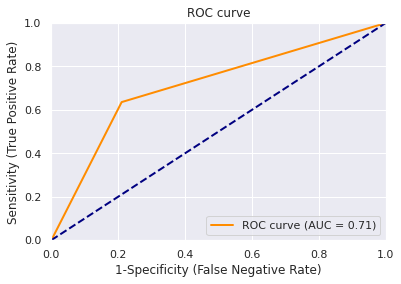

 AUC: 0.7128274241481789


In [ ]:
dtree=DecisionTreeClassifier(random_state=123)
dtree.fit(X_train, y_train)
y_pred_prob = dtree.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo Árbol de decisión: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper parameter tunning Decision Tree

Estos hyper parameter tunning se comentaron para evitar que se siguieran ejecutando en el futuro. La razón de esto es el tiempo que consumen

GridSearch

Hiper-parámetros optimizados: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}
modelo Árbol de decisión: Hyper parameter tunning 

Matriz de Confusión: 
[[298  73]
 [ 57 138]]
                                   Accuracy: 0.7703180212014135
                       SENSITIVITY (RECALL): 0.7076923076923077
                     SPECIFICITY (FALL-OUT): 0.8032345013477089
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6540284360189573
                  NEGATIVE PREDICTIVE VALUE: 0.8394366197183099
                                   F1 SCORE: 0.6798029556650247


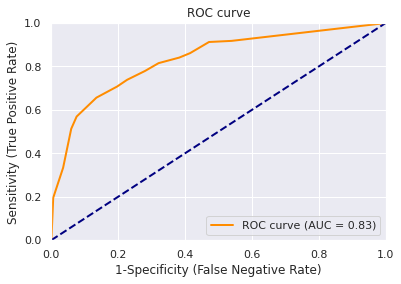

 AUC: 0.8333748012993296


In [ ]:
'''dtree=DecisionTreeClassifier(random_state=123)
parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

score={'AUC':make_scorer(roc_auc_score, greater_is_better=True)}
    #'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
grid=GridSearchCV(estimator=dtree,
                  param_grid=parameters,
                  scoring=score,
                  n_jobs=-1,
                  cv=stratified_kfold,
                  refit='AUC')
best_dtree=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = best_dtree.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo Árbol de decisión: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

RandomizedSearch

The total space of parameters 50 is smaller than n_iter=60. Running 50 iterations. For exhaustive searches, use GridSearchCV.


Hiper-parámetros optimizados: {'min_samples_leaf': 50, 'max_depth': 5, 'criterion': 'gini'}
Métricas del modelo de Random Forest model con los hiper-parámetros optimizados: 

modelo Árbol de decisión: Hyper parameter tunning 

Matriz de Confusión: 
[[298  73]
 [ 57 138]]
                                   Accuracy: 0.7703180212014135
                       SENSITIVITY (RECALL): 0.7076923076923077
                     SPECIFICITY (FALL-OUT): 0.8032345013477089
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6540284360189573
                  NEGATIVE PREDICTIVE VALUE: 0.8394366197183099
                                   F1 SCORE: 0.6798029556650247


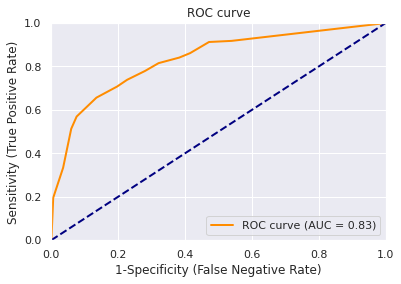

 AUC: 0.8333748012993296


In [ ]:
'''dtree=DecisionTreeClassifier(random_state=123)
parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
    #'AUC':make_scorer(roc_auc_score),
    #'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=dtree,
                  param_distributions=parameters,
                  scoring=scores,
                  n_jobs=-1,
                  cv=stratified_kfold,
                  n_iter=iter,
                  refit='AUC',
                  return_train_score=True)
best_dtree=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
print('Métricas del modelo de Árbol de decisión model con los hiper-parámetros optimizados: \n')
y_pred_prob = best_dtree.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo Árbol de decisión: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

In [ ]:
best_dt_param=dtree=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50,
                                           random_state=123)
best_dt_param.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

### Pipeline Hyper parameter tunning: Decision Tree

Se define una pipeline con diferentes pasos (over-sampling, scaling) en conjunto con el hyper parameter tunning usando RandomizedSearch (Que es más rápido que GridSearch)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Hiper-parámetros optimizados: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 100, 'over_sampling': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=123, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Métricas del modelo Árbol de decisión con los hiper-parámetros optimizados: 

modelo Árbol de decisión: Hyper parameter tunning 

Matriz de Confusión: 
[[267 104]
 [ 47 148]]
                                   Accuracy: 0.7332155477031802
                       SENSITIVITY (RECALL): 0.7589743589743589
                     SPECIFICITY (FALL-OUT): 0.7196765498652291
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.5873015873015873
                  NEGATIVE PREDICTIVE VALUE: 0.8503184713375797
                                   F1 SCORE: 0.6621923937360179


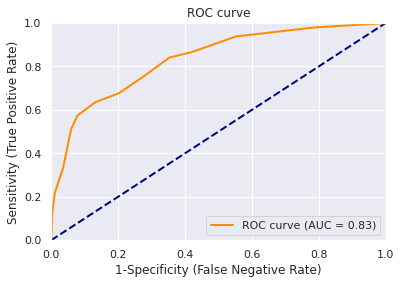

 AUC: 0.8342456285852512


In [ ]:
'''steps=[('over_sampling', SMOTE()),('scaler', StandardScaler()),
       ('classifier', DecisionTreeClassifier(random_state=123))]

pipeline=imbpipeline(steps)

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

parameters = {'over_sampling':[SMOTE(random_state=123),SMOTETomek(random_state=123),ADASYN(random_state=123)],
    'scaler': [StandardScaler(),MinMaxScaler(),Normalizer()],
    'classifier__max_depth': [2, 3, 5, 10, 20],
    'classifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'classifier__criterion': ["gini", "entropy"]
}
score={'AUC':make_scorer(roc_auc_score, greater_is_better=True)}
#scores={
 #   'AUC':make_scorer(roc_auc_score),
  #  'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
grid=GridSearchCV(estimator=pipeline,
                  param_grid=parameters,
                  scoring=make_scorer(roc_auc_score),
                  n_jobs=-1,
                  cv=stratified_kfold,
                  refit='AUC')
pipeline_dtree=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
print('Métricas del modelo Árbol de decisión con los hiper-parámetros optimizados: \n')
y_pred_prob = pipeline_dtree.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo Árbol de decisión: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

### SHAP Values Decision Tree

In [ ]:
dt_explainer=shap.TreeExplainer(best_dt_param)
dt_shap_values=dt_explainer.shap_values(X_test)

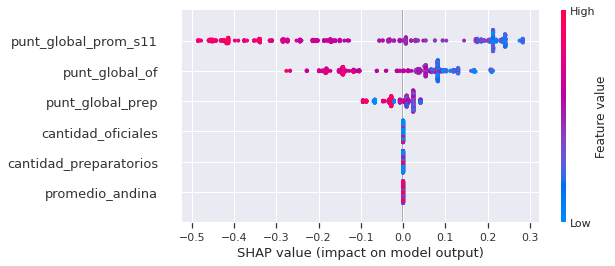

In [ ]:
shap.summary_plot(dt_shap_values[0], X_test)

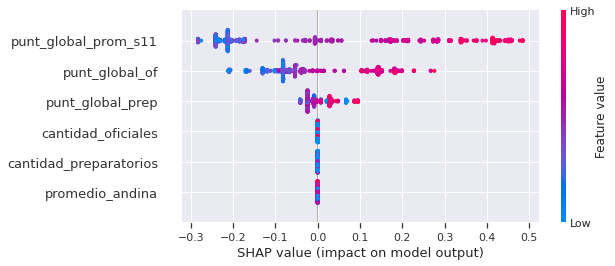

In [ ]:
shap.summary_plot(dt_shap_values[1], X_test)

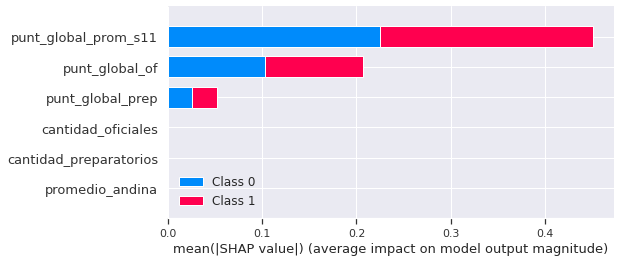

In [ ]:
shap.summary_plot(dt_shap_values, X_test, plot_type='bar')

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(best_dt_param).expected_value[0], dt_shap_values[0], X_test)

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(best_dt_param).expected_value[1], dt_shap_values[1], X_test)

## Random forest

Modelo Random Forest: 

Matriz de Confusión: 
[[303  68]
 [ 72 123]]
                                   Accuracy: 0.7526501766784452
                       SENSITIVITY (RECALL): 0.6307692307692307
                     SPECIFICITY (FALL-OUT): 0.816711590296496
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.643979057591623
                  NEGATIVE PREDICTIVE VALUE: 0.808
                                   F1 SCORE: 0.6373056994818653


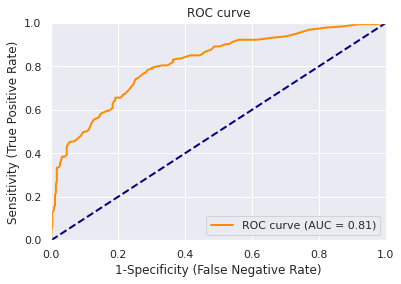

 AUC: 0.8148317091713317


In [ ]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('Modelo Random Forest: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper parameter tunning Random Forest

Estos hyper parameter tunning se comentaron para evitar que se siguieran ejecutando en el futuro. La razón de esto es el tiempo que consumen

GridSearch

Hiper-parámetros optimizados: {'criterion': 'gini', 'max_depth': 6, 'max_features': 2, 'n_estimators': 200}
Modelo Random Forest: Hyper parameter tunning 

Matriz de Confusión: 
[[276  95]
 [ 49 146]]
                                   Accuracy: 0.7455830388692579
                       SENSITIVITY (RECALL): 0.7487179487179487
                     SPECIFICITY (FALL-OUT): 0.7439353099730458
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6058091286307054
                  NEGATIVE PREDICTIVE VALUE: 0.8492307692307692
                                   F1 SCORE: 0.6697247706422018


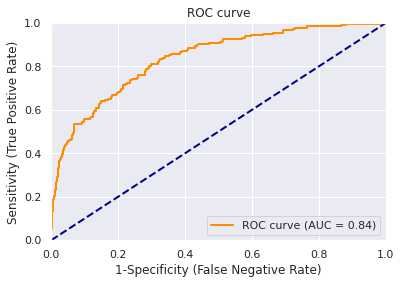

 AUC: 0.8364918100767158


In [ ]:
'''rf = RandomForestClassifier(class_weight='balanced',n_jobs=-1, random_state=1234)
parameters={
    'criterion':['gini', 'entropy'],
    'max_features':[2,3,4,5,6,7],
    'max_depth':[6,12,18,24],
    'n_estimators': [100,200,300,400,500]
}
scores={
    'AUC':make_scorer(roc_auc_score),
    'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
}
grid=GridSearchCV(estimator=rf,
                  param_grid=parameters,
                  scoring=scores,
                  n_jobs=-1,
                  cv=5,
                  refit='AUC')
best_rf=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = best_rf.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('Modelo Random Forest: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

RandomizedSearch

Hiper-parámetros optimizados: {'n_estimators': 400, 'max_features': 2, 'max_depth': 6, 'criterion': 'entropy'}
Métricas del modelo de Random Forest model con los hiper-parámetros optimizados: 

modelo Árbol de decisión: Hyper parameter tunning 

Matriz de Confusión: 
[[274  97]
 [ 47 148]]
                                   Accuracy: 0.7455830388692579
                       SENSITIVITY (RECALL): 0.7589743589743589
                     SPECIFICITY (FALL-OUT): 0.738544474393531
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6040816326530613
                  NEGATIVE PREDICTIVE VALUE: 0.8535825545171339
                                   F1 SCORE: 0.6727272727272727


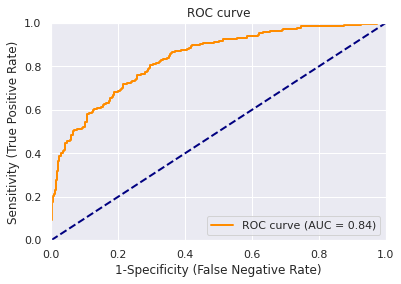

 AUC: 0.8375423318819545


In [ ]:
'''rf = RandomForestClassifier(class_weight='balanced',n_jobs=-1, random_state=1234)
parameters={
    'criterion':['gini', 'entropy'],
    'max_features':[2,3,4,5,6,7],
    'max_depth':[6,12,18,24],
    'n_estimators': [100,200,300,400,500]
}
score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
    #'AUC':make_scorer(roc_auc_score),
    #'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=rf,
                  param_distributions=parameters,
                  scoring=scores,
                  n_jobs=-1,
                  cv=5,
                  n_iter=iter,
                  refit='AUC',
                  return_train_score=True)
best_rf=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
print('Métricas del modelo de Random Forest con los hiper-parámetros optimizados: \n')
y_pred_prob = best_rf.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo Random Forest: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

In [ ]:
best_rf_param = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=6, max_features=2, n_estimators=200,n_jobs=-1, random_state=1234)
best_rf_param.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

### Pipeline Hyper parameter tunning: Random Forest

Se define una pipeline con diferentes pasos (over-sampling, scaling) en conjunto con el hyper parameter tunning usando RandomizedSearch (Que es más rápido que GridSearch)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Hiper-parámetros optimizados: {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'over_sampling': ADASYN(n_jobs=1, n_neighbors=5, random_state=123, ratio=None,
       sampling_strategy='auto'), 'classifier__n_estimators': 500, 'classifier__max_features': 2, 'classifier__max_depth': 6, 'classifier__criterion': 'gini'}
modelo Árbol de decisión: Hyper parameter tunning 

Métricas del modelo de Random Forest model con los hiper-parámetros optimizados: 

Matriz de Confusión: 
[[268 103]
 [ 45 150]]
                                   Accuracy: 0.7385159010600707
                       SENSITIVITY (RECALL): 0.7692307692307693
                     SPECIFICITY (FALL-OUT): 0.7223719676549866
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.5928853754940712
                  NEGATIVE PREDICTIVE VALUE: 0.8562300319488818
                                   F1 SCORE: 0.6696428571428572


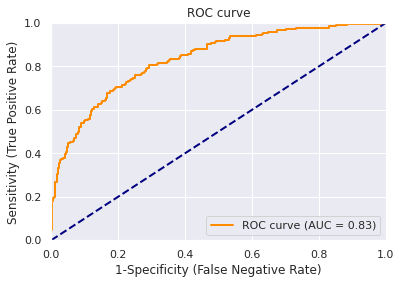

 AUC: 0.8345842836408872


In [ ]:
'''steps=[('over_sampling', SMOTE()),('scaler', StandardScaler()),
       ('classifier', RandomForestClassifier(class_weight='balanced',n_jobs=-1, random_state=1234))]

pipeline=imbpipeline(steps)

'''stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)'''

parameters = {'over_sampling':[SMOTE(random_state=123),SMOTETomek(random_state=123),ADASYN(random_state=123)],
    'scaler': [StandardScaler(),MinMaxScaler(),Normalizer()],
    'classifier__criterion':['gini', 'entropy'],
    'classifier__max_features':[2,3,4,5,6,7],
    'classifier__max_depth':[6,12,18,24],
    'classifier__n_estimators': [100,200,300,400,500]
}
score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
#scores={
 #   'AUC':make_scorer(roc_auc_score),
  #  'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=pipeline,
                  param_distributions=parameters,
                  scoring=score,
                  n_jobs=-1,
                  cv=10,
                  refit='AUC')
pipe_rf=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = pipe_rf.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo Árbol de decisión: Hyper parameter tunning \n')
print('Métricas del modelo de Random Forest model con los hiper-parámetros optimizados: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

### SHAP Values Random Forest

In [ ]:
rf_explainer=shap.TreeExplainer(best_rf_param)
rf_shap_values=rf_explainer.shap_values(X_test)

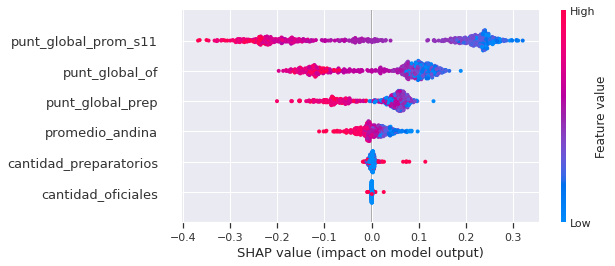

In [ ]:
shap.summary_plot(rf_shap_values[0], X_test)

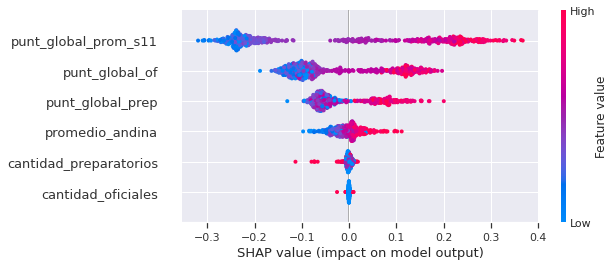

In [ ]:
shap.summary_plot(rf_shap_values[1], X_test)

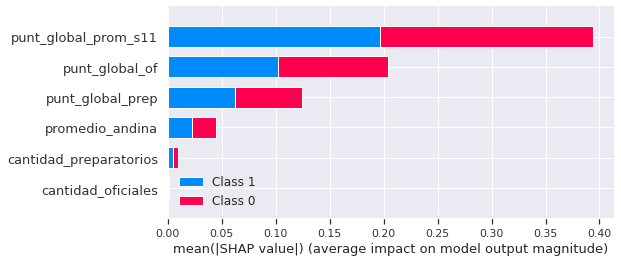

In [ ]:
shap.summary_plot(rf_shap_values, X_test, plot_type='bar')

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(best_rf_param).expected_value[0], rf_shap_values[0], X_test)

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(best_rf_param).expected_value[1], rf_shap_values[1], X_test)

## AdaBoost

modelo AdaBoost: 

Matriz de Confusión: 
[[318  53]
 [ 76 119]]
                                   Accuracy: 0.7720848056537103
                       SENSITIVITY (RECALL): 0.6102564102564103
                     SPECIFICITY (FALL-OUT): 0.8571428571428571
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6918604651162791
                  NEGATIVE PREDICTIVE VALUE: 0.8071065989847716
                                   F1 SCORE: 0.6485013623978203


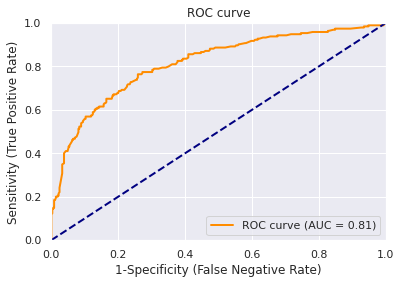

 AUC: 0.8146105466860185


In [ ]:
adaboost= AdaBoostClassifier( random_state=123)
adaboost.fit(X_train, y_train)
y_pred_prob = adaboost.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo AdaBoost: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper parameter tunning AdaBoost


Estos hyper parameter tunning se comentaron para evitar que se siguieran ejecutando en el futuro. La razón de esto es el tiempo que consumen


GridSearch

Hiper-parámetros optimizados: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
modelo AdaBoost: Hyper parameter tunning 

Matriz de Confusión: 
[[284  87]
 [ 52 143]]
                                   Accuracy: 0.7544169611307421
                       SENSITIVITY (RECALL): 0.7333333333333333
                     SPECIFICITY (FALL-OUT): 0.7654986522911051
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6217391304347826
                  NEGATIVE PREDICTIVE VALUE: 0.8452380952380952
                                   F1 SCORE: 0.6729411764705883


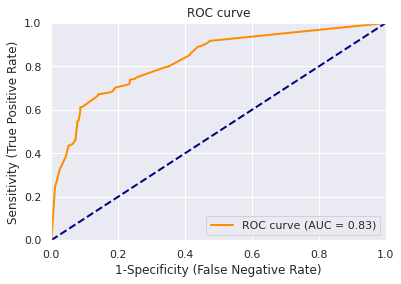

 AUC: 0.8314188955698388


In [ ]:
'''adaboost= AdaBoostClassifier( random_state=123)
parameters={
    'learning_rate':[0.2,0.1,0.01],
    'n_estimators': [100,200,300,400,500],
    'algorithm':['SAMME','SAMME.R']
}
scores={
   'AUC':make_scorer(roc_auc_score),
   'F1':make_scorer(f1_score)
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
}
grid=GridSearchCV(estimator=adaboost,
                  param_grid=parameters,
                  scoring=scores,
                  n_jobs=-1,
                  cv=5,
                  refit='AUC')
best_adaboost=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = best_adaboost.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo AdaBoost: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

RandomizedSearch

The total space of parameters 30 is smaller than n_iter=60. Running 30 iterations. For exhaustive searches, use GridSearchCV.


Hiper-parámetros optimizados: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME'}
Métricas del modelo de AdaBoost con los hiper-parámetros optimizados: 

modelo AdaBoost: Hyper parameter tunning 

Matriz de Confusión: 
[[284  87]
 [ 52 143]]
                                   Accuracy: 0.7544169611307421
                       SENSITIVITY (RECALL): 0.7333333333333333
                     SPECIFICITY (FALL-OUT): 0.7654986522911051
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6217391304347826
                  NEGATIVE PREDICTIVE VALUE: 0.8452380952380952
                                   F1 SCORE: 0.6729411764705883


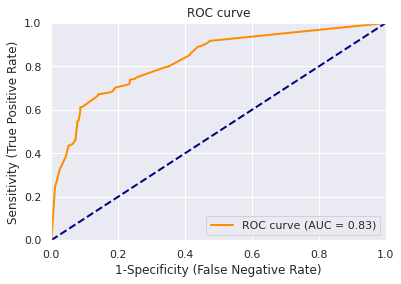

 AUC: 0.8314188955698388


In [ ]:
'''adaboost= AdaBoostClassifier(random_state=123)
parameters={
    'learning_rate':[0.2,0.1,0.01],
    'n_estimators': [100,200,300,400,500],
    'algorithm':['SAMME','SAMME.R']
}

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
    #'AUC':make_scorer(roc_auc_score),
    #'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=adaboost,
                  param_distributions=parameters,
                  scoring=score,
                  n_jobs=-1,
                  cv=stratified_kfold,
                  n_iter=iter,
                  refit='AUC',
                  return_train_score=True)
best_adaboost=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
print('Métricas del modelo de AdaBoost con los hiper-parámetros optimizados: \n')
y_pred_prob = best_adaboost.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo AdaBoost: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

In [ ]:
best_adaboost_param=AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01,n_estimators=100,
                                       random_state=123)
best_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=123),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.2, 0.1, 0.01],
                         'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit='AUC', return_train_score=False,
             scoring={'AUC': make_scorer(roc_auc_score),
                      'F1': make_scorer(f1_score)},
             verbose=0)

### Pipeline Hyper parameter tunning: AdaBoost:


Se define una pipeline con diferentes pasos (over-sampling, scaling) en conjunto con el hyper parameter tunning usando RandomizedSearch (Que es más rápido que GridSearch)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Hiper-parámetros optimizados: {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'over_sampling': SMOTETomek(random_state=123, ratio=None, sampling_strategy='auto', smote=None,
           tomek=None), 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.01, 'classifier__algorithm': 'SAMME.R'}
modelo AdaBoost: Hyper parameter tunning 

Métricas del modelo de AdaBoost con los hiper-parámetros optimizados: 

Matriz de Confusión: 
[[279  92]
 [ 52 143]]
                                   Accuracy: 0.7455830388692579
                       SENSITIVITY (RECALL): 0.7333333333333333
                     SPECIFICITY (FALL-OUT): 0.7520215633423181
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6085106382978723
                  NEGATIVE PREDICTIVE VALUE: 0.8429003021148036
                                   F1 SCORE: 0.6651162790697674


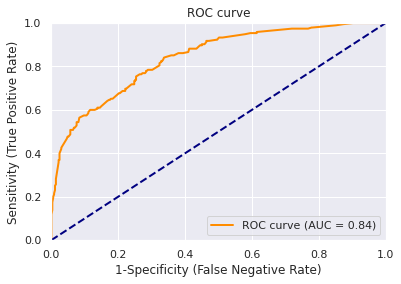

 AUC: 0.8406938972976709


In [ ]:
'''steps=[('over_sampling', SMOTE()),('scaler', StandardScaler()),
       ('classifier',AdaBoostClassifier(random_state=123))]

pipeline=imbpipeline(steps)

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

parameters = {'over_sampling':[SMOTE(random_state=123),SMOTETomek(random_state=123),ADASYN(random_state=123)],
    'scaler': [StandardScaler(),MinMaxScaler(),Normalizer()],
    'classifier__learning_rate':[0.2,0.1,0.01],
    'classifier__n_estimators': [100,200,300,400,500],
    'classifier__algorithm':['SAMME','SAMME.R']
}
score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
#scores={
 #   'AUC':make_scorer(roc_auc_score),
  #  'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=pipeline,
                  param_distributions=parameters,
                  scoring=score,
                  n_jobs=-1,
                  n_iter=iter,
                  cv=stratified_kfold,
                  refit='AUC')
pipeline_adaboost=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = pipeline_adaboost.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo AdaBoost: Hyper parameter tunning \n')
print('Métricas del modelo de AdaBoost con los hiper-parámetros optimizados: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

### SHAP Values AdaBoost

No se pueden calcular SHAP Values para AdaBoost.

## XGBoost

modelo XGBoost: 

Matriz de Confusión: 
[[303  68]
 [ 64 131]]
                                   Accuracy: 0.7667844522968198
                       SENSITIVITY (RECALL): 0.6717948717948717
                     SPECIFICITY (FALL-OUT): 0.816711590296496
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6582914572864321
                  NEGATIVE PREDICTIVE VALUE: 0.8256130790190735
                                   F1 SCORE: 0.6649746192893401


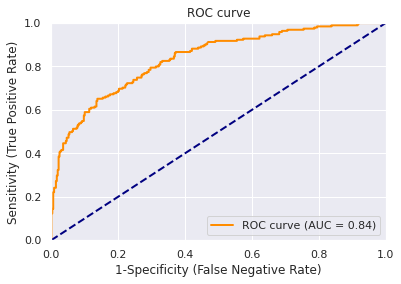

 AUC: 0.8363466721957287


In [ ]:
xgboost=xgb.XGBClassifier(random_state=123)
xgboost.fit(X_train, y_train)
y_pred_prob = xgboost.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo XGBoost: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper parameter tunning XGBoost

Estos hyper parameter tunning se comentaron para evitar que se siguieran ejecutando en el futuro. La razón de esto es el tiempo que consumen

GridSearch

Hiper-parámetros optimizados:{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
modelo XGBoost: Hyper parameter tunning 

Matriz de Confusión: 
[[300  71]
 [ 63 132]]
                                   Accuracy: 0.7632508833922261
                       SENSITIVITY (RECALL): 0.676923076923077
                     SPECIFICITY (FALL-OUT): 0.8086253369272237
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6502463054187192
                  NEGATIVE PREDICTIVE VALUE: 0.8264462809917356
                                   F1 SCORE: 0.663316582914573


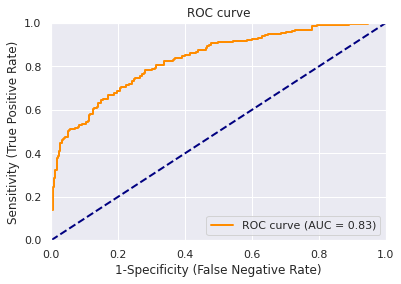

 AUC: 0.833464648558988


In [ ]:
'''xgboost=xgb.XGBClassifier(booster='gbtree', n_jobs=-1,random_state=123)
parameters={
    'learning_rate':[0.2,0.1,0.01, 0.001],
    'max_depth':[5,6,12,18,24,48],
    'n_estimators': [100,200,300,400,500],
    'colsample_bytree':[0.4,0.6,0.7,0.9]
}
#scores={
 #   'AUC':make_scorer(roc_auc_score),
  #  'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
grid=GridSearchCV(estimator=xgboost,
                  param_grid=parameters,
                  scoring=make_scorer(roc_auc_score),
                  n_jobs=-1,
                  cv=5)
best_xgb=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados:' + str(grid.best_params_))
y_pred_prob = best_xgb.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo XGBoost: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

In [ ]:
X_train_array=X_train.values
X_test_array=X_test.values

In [ ]:
best_xgb_param=xgb.XGBClassifier(booster='gbtree', n_jobs=-1,random_state=123, colsample=0.7, learning_rate=0.01, max_depth=6, n_estimators=400)
best_xgb_param.fit(X_train_array, y_train)

### Pipeline Hyper parameter tunning: XGBoost

Se define una pipeline con diferentes pasos (over-sampling, scaling) en conjunto con el hyper parameter tunning usando RandomizedSearch (Que es más rápido que GridSearch)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Hiper-parámetros optimizados: {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'over_sampling': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=123, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), 'classifier__n_estimators': 200, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.7}
modelo XGBoost: Hyper parameter tunning 

Métricas del modelo de XGBoost con los hiper-parámetros optimizados: 

Matriz de Confusión: 
[[280  91]
 [ 57 138]]
                                   Accuracy: 0.7385159010600707
                       SENSITIVITY (RECALL): 0.7076923076923077
                     SPECIFICITY (FALL-OUT): 0.7547169811320755
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6026200873362445
                  NEGATIVE PREDICTIVE VALUE: 0.8308605341246291
                                   F1 SCORE: 0.6509433962264151


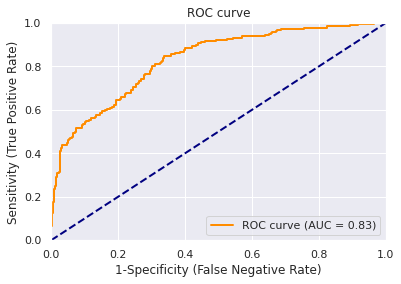

 AUC: 0.8300780980026262


In [ ]:
'''steps=[('over_sampling', SMOTE()),('scaler', StandardScaler()),
       ('classifier', xgb.XGBClassifier(booster='gbtree', n_jobs=-1,random_state=123))]

pipeline=imbpipeline(steps)

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

parameters = {'over_sampling':[SMOTE(random_state=123),SMOTETomek(random_state=123),ADASYN(random_state=123)],
    'scaler': [StandardScaler(),MinMaxScaler(),Normalizer()],
    'classifier__learning_rate':[0.2,0.1,0.01, 0.001],
    'classifier__max_depth':[5,6,12,18,24,48],
    'classifier__n_estimators': [100,200,300,400,500],
    'classifier__colsample_bytree':[0.4,0.6,0.7,0.9]
}
score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
#scores={
 #   'AUC':make_scorer(roc_auc_score),
  #  'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=pipeline,
                  param_distributions=parameters,
                  scoring=score,
                  n_jobs=-1,
                  n_iter=iter,
                  cv=stratified_kfold,
                  refit='AUC')
pipeline_xgboost=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = pipeline_xgboost.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo XGBoost: Hyper parameter tunning \n')
print('Métricas del modelo de XGBoost con los hiper-parámetros optimizados: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

### SHAP Values XGBoost

In [ ]:
xgb_explainer=shap.KernelExplainer(best_xgb_param.predict,X_test_array)
xgb_shap_values=xgb_explainer.shap_values(X_test_array)

In [ ]:
shap.summary_plot(xgb_shap_values, X_test_array)

In [ ]:
shap.summary_plot(xgb_shap_values, X_test_array, plot_type='bar')

In [ ]:
shap.dependence_plot("punt_global_prom_s11", xgb_shap_values, X_test_array)

In [ ]:
shap.dependence_plot("promedio_andina", xgb_shap_values, X_test_array)

In [ ]:
shap.dependence_plot("punt_global_prep", xgb_shap_values, X_test_array)

In [ ]:
shap.initjs()
shap.force_plot(shap.KernelExplainer(best_xgb_param).expected_value, xgb_shap_values, X_test_array)

## LightGBM

modelo LightGBM: 

Matriz de Confusión: 
[[293  78]
 [ 70 125]]
                                   Accuracy: 0.7385159010600707
                       SENSITIVITY (RECALL): 0.6410256410256411
                     SPECIFICITY (FALL-OUT): 0.7897574123989218
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6157635467980296
                  NEGATIVE PREDICTIVE VALUE: 0.8071625344352618
                                   F1 SCORE: 0.6281407035175879


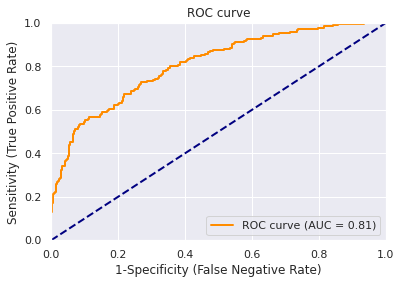

 AUC: 0.809883198562444


In [ ]:
lightgbm = lgb.LGBMClassifier(random_state=123)
lightgbm.fit(X_train, y_train)
y_pred_prob = lightgbm.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo LightGBM: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Hyper parameter tunning LightGBM

Estos hyper parameter tunning se comentaron para evitar que se siguieran ejecutando en el futuro. La razón de esto es el tiempo que consumen

GridSearch

Hiper-parámetros optimizados:{'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 15, 'num_leaves': 40}
modelo LightGBM: Hyper parameter tunning 

Matriz de Confusión: 
[[291  80]
 [ 61 134]]
                                   Accuracy: 0.7508833922261484
                       SENSITIVITY (RECALL): 0.6871794871794872
                     SPECIFICITY (FALL-OUT): 0.784366576819407
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6261682242990654
                  NEGATIVE PREDICTIVE VALUE: 0.8267045454545454
                                   F1 SCORE: 0.6552567237163814


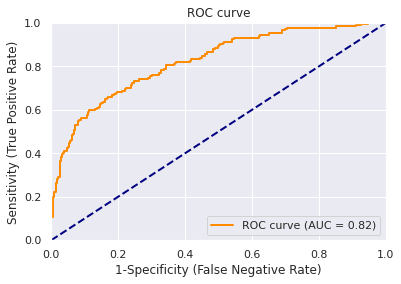

 AUC: 0.8232773515792384


In [ ]:
'''lightgbm = lgb.LGBMClassifier(random_state=123)
parameters={
   'num_leaves':[20,40,60,80,100],
   'min_child_samples':[5,10,15],
   'max_depth':[5,10,20],
   'learning_rate':[0.001,0.01,0.1,0.2]
}
#scores={
#    'AUC':make_scorer(roc_auc_score),
 #   'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
grid=GridSearchCV(estimator=lightgbm,
                  param_grid=parameters,
                  scoring=make_scorer(roc_auc_score),
                  n_jobs=-1,
                  cv=5)
best_lightgbm=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados:' + str(grid.best_params_))
y_pred_prob = best_lightgbm.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo LightGBM: Hyper parameter tunning \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

In [ ]:
best_lightgbm_param=lgb.LGBMClassifier(learning_rate=0.1, max_depth=5, min_child_samples=15,
                                       num_leaves=40, random_state=123)
best_lightgbm_param.fit(X_train, y_train)

### Pipeline Hyper parameter tunning: LightGBM

Se define una pipeline con diferentes pasos (over-sampling, scaling) en conjunto con el hyper parameter tunning usando RandomizedSearch (Que es más rápido que GridSearch)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Hiper-parámetros optimizados: {'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'over_sampling': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=123, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated'), 'classifier__num_leaves': 80, 'classifier__min_child_samples': 5, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
modelo LightGBM: Hyper parameter tunning 

Métricas del modelo de LightGBM con los hiper-parámetros optimizados: 

Matriz de Confusión: 
[[287  84]
 [ 63 132]]
                                   Accuracy: 0.7402826855123675
                       SENSITIVITY (RECALL): 0.676923076923077
                     SPECIFICITY (FALL-OUT): 0.7735849056603774
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.6111111111111112
                  NEGATIVE PREDICTIVE VALUE: 0.82
                                   F1 SCORE: 0.6423357664233577


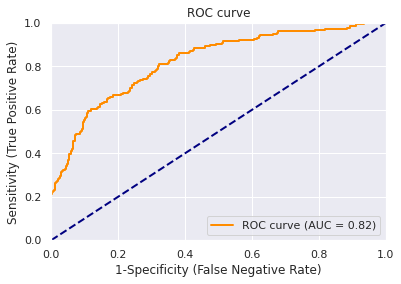

 AUC: 0.8224065242933167


In [ ]:
'''steps=[('over_sampling', SMOTE()),('scaler', StandardScaler()),
       ('classifier', lgb.LGBMClassifier(random_state=123))]

pipeline=imbpipeline(steps)

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=123)

parameters = {'over_sampling':[SMOTE(random_state=123),SMOTETomek(random_state=123),ADASYN(random_state=123)],
    'scaler': [StandardScaler(),MinMaxScaler(),Normalizer()],
    'classifier__num_leaves':[20,40,60,80,100],
    'classifier__min_child_samples':[5,10,15],
    'classifier__max_depth':[5,10,20],
    'classifier__learning_rate':[0.001,0.01,0.1,0.2]
}
score={'AUC': make_scorer(roc_auc_score, greater_is_better=True)}
#scores={
 #   'AUC':make_scorer(roc_auc_score),
  #  'F1':make_scorer(f1_score),
  #  'Accuracy':make_scorer(accuracy_score),
   # 'Precision':make_scorer(precision_score),
    #'Recall':make_scorer(recall_score)
#}
iter=60
grid=RandomizedSearchCV(estimator=pipeline,
                  param_distributions=parameters,
                  scoring=score,
                  n_jobs=-1,
                  n_iter=iter,
                  cv=stratified_kfold,
                  refit='AUC')
pipeline_lightgbm=grid.fit(X_train, y_train)
print('Hiper-parámetros optimizados: ' + str(grid.best_params_))
y_pred_prob = pipeline_lightgbm.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)
print('modelo LightGBM: Hyper parameter tunning \n')
print('Métricas del modelo de LightGBM con los hiper-parámetros optimizados: \n')
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n" + str(cm))
print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))
print("                                   F1 SCORE: " + str(f1_score(y_test,y_pred)))
plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))'''

### SHAP Values LightGBM

In [ ]:
lightgbm_explainer=shap.TreeExplainer(best_lightgbm_param)
lightgbm_shap_values=lightgbm_explainer.shap_values(X_test)

In [ ]:
lightgbm_shap_values

In [ ]:
shap.summary_plot(lightgbm_shap_values[0], X_test)

In [ ]:
shap.summary_plot(lightgbm_shap_values[1], X_test)

In [ ]:
shap.summary_plot(lightgbm_shap_values, X_test, plot_type='bar')

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(best_lightgbm_param).expected_value[0], lightgbm_shap_values[0], X_test)

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(best_lightgbm_param).expected_value[1], lightgbm_shap_values[1], X_test)

#**UNSUPERVISED LEARNING**

In [ ]:
data=pd.read_csv(os.path.join(path2, file_name), sep=';', index_col=0)

Columns (2,14) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
today=datetime.today()

##### Creación variable edad

In [ ]:
data['fecha_nac_andina']=pd.to_datetime(data['fecha_nac_andina']).dt.date
data['edad']=data['fecha_nac_andina'].apply(lambda x: today.year-x.year-((today.month, today.day)<(x.month, x.day)))
data['edad'].isnull().sum()

49

In [ ]:
data['edad'].replace(np.nan,0, inplace=True)
data['edad']=data['edad'].astype('int64')

Se restan 1 o 2 años a la edad calculado de acuerdo al año cuando el estudiante presentó SaberPro, esto para saber la edad de este en ese momento

In [ ]:
def edad_corregida(z):
  if (z['anio_saberpro']==2020):
    return z['edad']-1
  else:
    return z['edad']-2

In [ ]:
data['edad_corregida']=data.apply(edad_corregida, axis=1)

In [ ]:
data_unsup= data[["punt_global_prom_s11","punt_global_saberpro","punt_global_prep",
           "cantidad_preparatorios","punt_global_of","cantidad_oficiales","ESTU_GENERO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA",
           "COLE_AREA_UBICACION_S11","ESTU_PRGM_ACADEMICO","promedio_andina", 'edad_corregida']]

In [ ]:
data_unsup=data_unsup.query('edad_corregida>0 & punt_global_saberpro>0 & punt_global_of>10 & punt_global_prep>10 & promedio_andina>2 & cantidad_preparatorios>0 & cantidad_oficiales>0 & punt_global_prom_s11>1')
data_unsup.head()

punt_global_prom_s11  ...  edad_corregida
70                  227.7  ...              36
102                 266.0  ...              37
264                 217.0  ...              36
321                 232.2  ...              36
441                 212.0  ...              36

[5 rows x 13 columns]

### EDA dataset

In [ ]:
data_unsup.shape

(1885, 13)

In [ ]:
data_unsup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 70 to 15434
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   punt_global_prom_s11     1885 non-null   float64
 1   punt_global_saberpro     1885 non-null   float64
 2   punt_global_prep         1885 non-null   float64
 3   cantidad_preparatorios   1885 non-null   float64
 4   punt_global_of           1885 non-null   float64
 5   cantidad_oficiales       1885 non-null   float64
 6   ESTU_GENERO              1884 non-null   object 
 7   ESTU_DEPTO_RESIDE        1880 non-null   object 
 8   FAMI_ESTRATOVIVIENDA     1840 non-null   object 
 9   COLE_AREA_UBICACION_S11  1885 non-null   object 
 10  ESTU_PRGM_ACADEMICO      1885 non-null   object 
 11  promedio_andina          1885 non-null   float64
 12  edad_corregida           1885 non-null   int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 206.2+ KB


In [ ]:
data_unsup.isnull().sum()

punt_global_prom_s11        0
punt_global_saberpro        0
punt_global_prep            0
cantidad_preparatorios      0
punt_global_of              0
cantidad_oficiales          0
ESTU_GENERO                 1
ESTU_DEPTO_RESIDE           5
FAMI_ESTRATOVIVIENDA       45
COLE_AREA_UBICACION_S11     0
ESTU_PRGM_ACADEMICO         0
promedio_andina             0
edad_corregida              0
dtype: int64

In [ ]:
data_unsup['ESTU_GENERO'].replace(np.nan,'Sin Genero', inplace=True)
data_unsup['ESTU_DEPTO_RESIDE'].replace(np.nan,'Sin Departamento', inplace=True)
data_unsup['FAMI_ESTRATOVIVIENDA'].replace(np.nan,'Sin Estrato', inplace=True)
data_unsup.isnull().sum()

punt_global_prom_s11       0
punt_global_saberpro       0
punt_global_prep           0
cantidad_preparatorios     0
punt_global_of             0
cantidad_oficiales         0
ESTU_GENERO                0
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA       0
COLE_AREA_UBICACION_S11    0
ESTU_PRGM_ACADEMICO        0
promedio_andina            0
edad_corregida             0
dtype: int64

In [ ]:
data_unsup['ESTU_GENERO'].value_counts()

F             1298
M              586
Sin Genero       1
Name: ESTU_GENERO, dtype: int64

In [ ]:
data_unsup['ESTU_DEPTO_RESIDE'].value_counts()

BOGOTÁ              878
RISARALDA           424
CESAR               193
CUNDINAMARCA        150
VALLE                83
CALDAS               27
LA GUAJIRA           23
QUINDIO              17
TOLIMA               12
NORTE SANTANDER       9
BOYACA                9
NARIÑO                9
ANTIOQUIA             8
MAGDALENA             7
BOLIVAR               6
Sin Departamento      5
HUILA                 5
META                  3
CAUCA                 3
SUCRE                 3
CAQUETA               3
SAN ANDRES            2
ATLANTICO             2
SANTANDER             1
PUTUMAYO              1
CASANARE              1
CORDOBA               1
Name: ESTU_DEPTO_RESIDE, dtype: int64

In [ ]:
data_unsup['FAMI_ESTRATOVIVIENDA'].value_counts()

Estrato 2      742
Estrato 3      698
Estrato 1      209
Estrato 4      133
Sin Estrato     50
Estrato 5       49
Estrato 6        4
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [ ]:
data_unsup['ESTU_PRGM_ACADEMICO'].value_counts()

ENFERMERIA                                    355
ADMINISTRACION DE EMPRESAS                    214
ADMINISTRACIÓN DE EMPRESAS                    146
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO        127
TERAPIA RESPIRATORIA                          101
FISIOTERAPIA                                   98
INSTRUMENTACION QUIRURGICA                     91
MERCADEO Y PUBLICIDAD                          91
NEGOCIOS INTERNACIONALES                       67
PSICOLOGIA                                     66
CONTADURIA PÚBLICA                             65
INGENIERIA DE MINAS                            61
PSICOLOGÍA                                     54
OPTOMETRIA                                     53
INGENIERÍA CIVIL                               51
DISEÑO GRAFICO                                 50
LICENCIATURA EN PEDAGOGÍA INFANTIL             35
DERECHO                                        34
ADMINISTRACION DE NEGOCIOS INTERNACIONALES     28
CONTADURIA PUBLICA                             28


In [ ]:
data_unsup['COLE_AREA_UBICACION_S11'].value_counts()

URBANO    1472
S.I        329
RURAL       84
Name: COLE_AREA_UBICACION_S11, dtype: int64

In [ ]:
data_unsup['edad_corregida'].describe().T

count    1885.000000
mean       23.307162
std         3.374466
min        18.000000
25%        21.000000
50%        22.000000
75%        25.000000
max        50.000000
Name: edad_corregida, dtype: float64

##### Creación variable categórica edad

In [ ]:
def cat_edad(z):
  if (z['edad_corregida']<18):
    return '<18'
  elif ((z['edad_corregida']>=18)&(z['edad_corregida']<21)):
    return '18-21'
  elif ((z['edad_corregida']>=21)&(z['edad_corregida']<25)):
    return '21-25'
  else:
    return '>25'

In [ ]:
data_unsup['cat_edad']=data_unsup.apply( cat_edad, axis=1)
data_unsup['cat_edad'].value_counts()

21-25    1125
>25       495
18-21     265
Name: cat_edad, dtype: int64

In [ ]:
data_unsup['y']=np.where(data_unsup['punt_global_saberpro']>150,1,0)
data_unsup_0=data_unsup[data_unsup['y']==0]
data_unsup_1=data_unsup[data_unsup['y']==1]

## I. Estudiantes con puntaje SaberPro por debajo de la media nacional

In [ ]:
data_unsup_0.head()

punt_global_prom_s11  punt_global_saberpro  ...  cat_edad  y
70                  227.7                 136.0  ...       >25  0
102                 266.0                 124.0  ...       >25  0
264                 217.0                 123.0  ...       >25  0
321                 232.2                 130.0  ...       >25  0
441                 212.0                 144.0  ...       >25  0

[5 rows x 15 columns]

In [ ]:
data_unsup_0.shape

(1208, 15)

            ESTU_GENERO  porcentaje
F                   860    0.711921
M                   347    0.287252
Sin Genero            1    0.000828


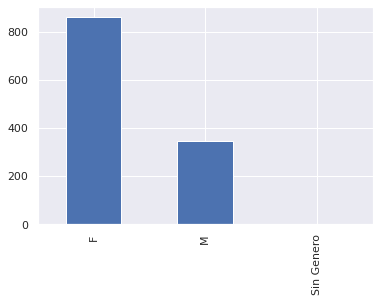

In [ ]:
genero_0=data_unsup_0['ESTU_GENERO'].value_counts().to_frame('ESTU_GENERO')
genero_0['porcentaje']=genero_0['ESTU_GENERO']/genero_0['ESTU_GENERO'].sum()
print(genero_0)
data_unsup_0['ESTU_GENERO'].value_counts().plot(kind='bar')

In [ ]:
genero_0.head()

ESTU_GENERO  porcentaje
F                   860    0.711921
M                   347    0.287252
Sin Genero            1    0.000828

In [ ]:
data_unsup_0=data_unsup_0[data_unsup_0['ESTU_GENERO']!='Sin Genero']

                  ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                          580    0.480530
RISARALDA                       248    0.205468
CESAR                           106    0.087821
CUNDINAMARCA                    102    0.084507
VALLE                            59    0.048882
CALDAS                           20    0.016570
LA GUAJIRA                       14    0.011599
QUINDIO                          11    0.009114
TOLIMA                            9    0.007457
NORTE SANTANDER                   9    0.007457
ANTIOQUIA                         7    0.005800
BOYACA                            6    0.004971
HUILA                             5    0.004143
MAGDALENA                         4    0.003314
Sin Departamento                  4    0.003314
BOLIVAR                           4    0.003314
NARIÑO                            4    0.003314
CAUCA                             3    0.002486
CAQUETA                           3    0.002486
SUCRE                             2    0

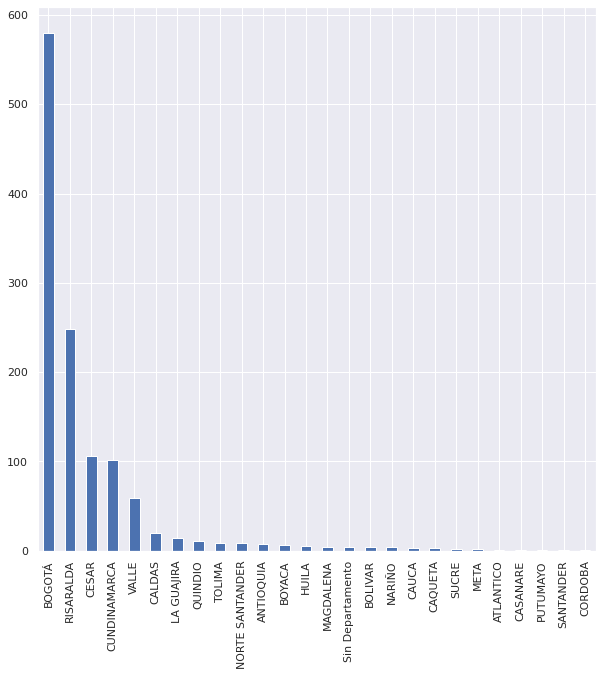

In [ ]:
depto_0=data_unsup_0['ESTU_DEPTO_RESIDE'].value_counts().to_frame('ESTU_DEPTO_RESIDE')
depto_0['porcentaje']=depto_0['ESTU_DEPTO_RESIDE']/depto_0['ESTU_DEPTO_RESIDE'].sum()
print(depto_0)
data_unsup_0['ESTU_DEPTO_RESIDE'].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
depto_0.head(30)

ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                          580    0.480530
RISARALDA                       248    0.205468
CESAR                           106    0.087821
CUNDINAMARCA                    102    0.084507
VALLE                            59    0.048882
CALDAS                           20    0.016570
LA GUAJIRA                       14    0.011599
QUINDIO                          11    0.009114
TOLIMA                            9    0.007457
NORTE SANTANDER                   9    0.007457
ANTIOQUIA                         7    0.005800
BOYACA                            6    0.004971
HUILA                             5    0.004143
MAGDALENA                         4    0.003314
Sin Departamento                  4    0.003314
BOLIVAR                           4    0.003314
NARIÑO                            4    0.003314
CAUCA                             3    0.002486
CAQUETA                           3    0.002486
SUCRE                             2    0.001657
META                              2    0.001657
ATLANTICO                         1    0.000829
CASANARE                          1    0.000829
PUTUMAYO                          1    0.000829
SANTANDER                         1    0.000829
CORDOBA                           1    0.000829

Hay departamentos que concentran poca cantidad de estudiantes. Se agrupan todos los departamentos que tengan menos del 4% de las observaciones del total

              ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                      580    0.480530
RISARALDA                   248    0.205468
Otros                       112    0.092792
CESAR                       106    0.087821
CUNDINAMARCA                102    0.084507
VALLE                        59    0.048882


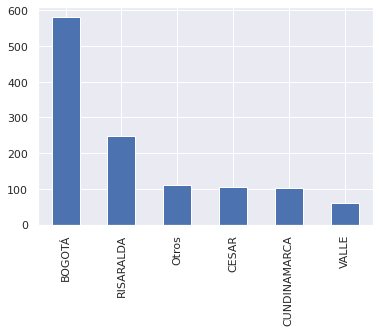

In [ ]:
data_unsup_0.loc[data_unsup_0['ESTU_DEPTO_RESIDE'].isin((data_unsup_0['ESTU_DEPTO_RESIDE'].value_counts()[data_unsup_0['ESTU_DEPTO_RESIDE'].value_counts(normalize=True) < 0.04]).index), 'ESTU_DEPTO_RESIDE'] = 'Otros'
depto_0=data_unsup_0['ESTU_DEPTO_RESIDE'].value_counts().to_frame('ESTU_DEPTO_RESIDE')
depto_0['porcentaje']=depto_0['ESTU_DEPTO_RESIDE']/depto_0['ESTU_DEPTO_RESIDE'].sum()
print(depto_0)
data_unsup_0['ESTU_DEPTO_RESIDE'].value_counts().plot(kind='bar')

In [ ]:
depto_0.head(6)

ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                      580    0.480530
RISARALDA                   248    0.205468
Otros                       112    0.092792
CESAR                       106    0.087821
CUNDINAMARCA                102    0.084507
VALLE                        59    0.048882

             FAMI_ESTRATOVIVIENDA  porcentaje
Estrato 2                     511    0.423364
Estrato 3                     416    0.344656
Estrato 1                     149    0.123447
Estrato 4                      71    0.058824
Sin Estrato                    35    0.028998
Estrato 5                      24    0.019884
Estrato 6                       1    0.000829


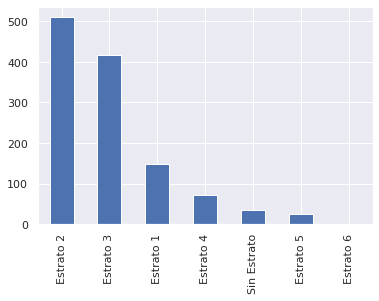

In [ ]:
estrato_0=data_unsup_0['FAMI_ESTRATOVIVIENDA'].value_counts().to_frame('FAMI_ESTRATOVIVIENDA')
estrato_0['porcentaje']=estrato_0['FAMI_ESTRATOVIVIENDA']/estrato_0['FAMI_ESTRATOVIVIENDA'].sum()
print(estrato_0)
data_unsup_0['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [ ]:
#data_unsup_0=data_unsup_0[data_unsup_0['FAMI_ESTRATOVIVIENDA']!='Estrato 6']

In [ ]:
estrato_0.head(7)

FAMI_ESTRATOVIVIENDA  porcentaje
Estrato 2                     511    0.423364
Estrato 3                     416    0.344656
Estrato 1                     149    0.123447
Estrato 4                      71    0.058824
Sin Estrato                    35    0.028998
Estrato 5                      24    0.019884
Estrato 6                       1    0.000829

       cat_edad  porcentaje
21-25       713    0.590721
>25         374    0.309859
18-21       120    0.099420


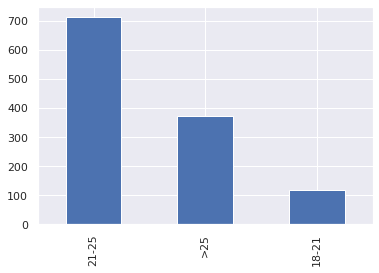

In [ ]:
edad_0=data_unsup_0['cat_edad'].value_counts().to_frame('cat_edad')
edad_0['porcentaje']=edad_0['cat_edad']/edad_0['cat_edad'].sum()
print(edad_0)
data_unsup_0['cat_edad'].value_counts().plot(kind='bar')

In [ ]:
edad_0.head()

cat_edad  porcentaje
21-25       713    0.590721
>25         374    0.309859
18-21       120    0.099420

        COLE_AREA_UBICACION_S11  porcentaje
URBANO                      916    0.758906
S.I                         243    0.201326
RURAL                        48    0.039768


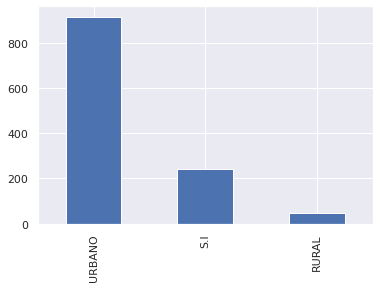

In [ ]:
colegio_0=data_unsup_0['COLE_AREA_UBICACION_S11'].value_counts().to_frame('COLE_AREA_UBICACION_S11')
colegio_0['porcentaje']=colegio_0['COLE_AREA_UBICACION_S11']/colegio_0['COLE_AREA_UBICACION_S11'].sum()
print(colegio_0)
data_unsup_0['COLE_AREA_UBICACION_S11'].value_counts().plot(kind='bar')

In [ ]:
colegio_0.head()

COLE_AREA_UBICACION_S11  porcentaje
URBANO                      916    0.758906
S.I                         243    0.201326
RURAL                        48    0.039768

                                            ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                                  271    0.224524
ADMINISTRACION DE EMPRESAS                                  150    0.124275
ADMINISTRACIÓN DE EMPRESAS                                   98    0.081193
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                       82    0.067937
TERAPIA RESPIRATORIA                                         74    0.061309
INSTRUMENTACION QUIRURGICA                                   61    0.050539
FISIOTERAPIA                                                 58    0.048053
MERCADEO Y PUBLICIDAD                                        48    0.039768
PSICOLOGÍA                                                   38    0.031483
CONTADURIA PÚBLICA                                           37    0.030655
PSICOLOGIA                                                   35    0.028998
NEGOCIOS INTERNACIONALES                                     32    0.026512
LICENCIATURA

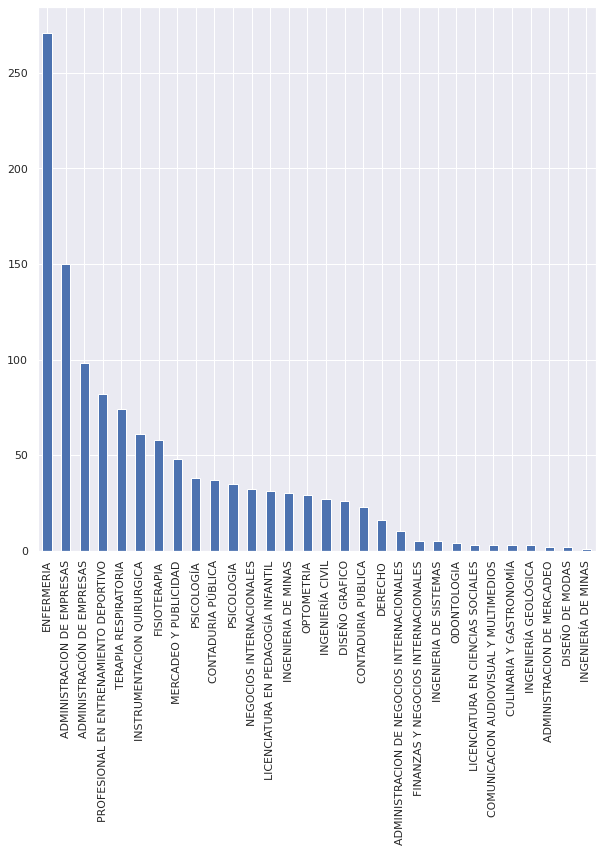

In [ ]:
programa_0=data_unsup_0["ESTU_PRGM_ACADEMICO"].value_counts().to_frame("ESTU_PRGM_ACADEMICO")
programa_0['porcentaje']=programa_0["ESTU_PRGM_ACADEMICO"]/programa_0["ESTU_PRGM_ACADEMICO"].sum()
print(programa_0)
data_unsup_0["ESTU_PRGM_ACADEMICO"].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
programa_0.head(20)

ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                                  271    0.224524
ADMINISTRACION DE EMPRESAS                                  150    0.124275
ADMINISTRACIÓN DE EMPRESAS                                   98    0.081193
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                       82    0.067937
TERAPIA RESPIRATORIA                                         74    0.061309
INSTRUMENTACION QUIRURGICA                                   61    0.050539
FISIOTERAPIA                                                 58    0.048053
MERCADEO Y PUBLICIDAD                                        48    0.039768
PSICOLOGÍA                                                   38    0.031483
CONTADURIA PÚBLICA                                           37    0.030655
PSICOLOGIA                                                   35    0.028998
NEGOCIOS INTERNACIONALES                                     32    0.026512
LICENCIATURA EN PEDAGOGÍA INFANTIL                           31    0.025684
INGENIERIA DE MINAS                                          30    0.024855
OPTOMETRIA                                                   29    0.024027
INGENIERÍA CIVIL                                             27    0.022370
DISEÑO GRAFICO                                               26    0.021541
CONTADURIA PUBLICA                                           23    0.019056
DERECHO                                                      16    0.013256
ADMINISTRACION DE NEGOCIOS INTERNACIONALES                   10    0.008285

Hay programas académicos que concentran poca cantidad de estudiantes. Se agrupan todos los programas académicos que tengan menos del 4% de las observaciones del total

                                        ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                              271    0.224524
ADMINISTRACION DE EMPRESAS                              150    0.124275
ADMINISTRACIÓN DE EMPRESAS                               98    0.081193
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                   82    0.067937
Otros                                                    80    0.066280
TERAPIA RESPIRATORIA                                     74    0.061309
INSTRUMENTACION QUIRURGICA                               61    0.050539
FISIOTERAPIA                                             58    0.048053
MERCADEO Y PUBLICIDAD                                    48    0.039768
PSICOLOGÍA                                               38    0.031483
CONTADURIA PÚBLICA                                       37    0.030655
PSICOLOGIA                                               35    0.028998
NEGOCIOS INTERNACIONALES                                 32    0

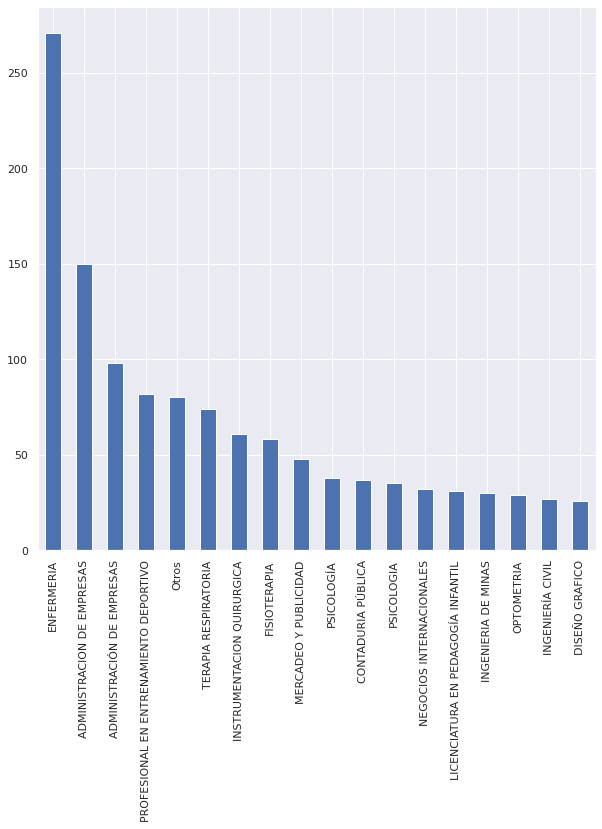

In [ ]:
data_unsup_0.loc[data_unsup_0["ESTU_PRGM_ACADEMICO"].isin((data_unsup_0["ESTU_PRGM_ACADEMICO"].value_counts()[data_unsup_0["ESTU_PRGM_ACADEMICO"].value_counts(normalize=True) < 0.02]).index), "ESTU_PRGM_ACADEMICO"] = 'Otros'
programa_0=data_unsup_0["ESTU_PRGM_ACADEMICO"].value_counts().to_frame("ESTU_PRGM_ACADEMICO")
programa_0['porcentaje']=programa_0["ESTU_PRGM_ACADEMICO"]/programa_0["ESTU_PRGM_ACADEMICO"].sum()
print(programa_0)
data_unsup_0["ESTU_PRGM_ACADEMICO"].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
programa_0.head(20)

ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                              271    0.224524
ADMINISTRACION DE EMPRESAS                              150    0.124275
ADMINISTRACIÓN DE EMPRESAS                               98    0.081193
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                   82    0.067937
Otros                                                    80    0.066280
TERAPIA RESPIRATORIA                                     74    0.061309
INSTRUMENTACION QUIRURGICA                               61    0.050539
FISIOTERAPIA                                             58    0.048053
MERCADEO Y PUBLICIDAD                                    48    0.039768
PSICOLOGÍA                                               38    0.031483
CONTADURIA PÚBLICA                                       37    0.030655
PSICOLOGIA                                               35    0.028998
NEGOCIOS INTERNACIONALES                                 32    0.026512
LICENCIATURA EN PEDAGOGÍA INFANTIL                       31    0.025684
INGENIERIA DE MINAS                                      30    0.024855
OPTOMETRIA                                               29    0.024027
INGENIERÍA CIVIL                                         27    0.022370
DISEÑO GRAFICO                                           26    0.021541

In [ ]:
data_unsup_0.describe().T

count        mean        std  ...    50%     75%    max
punt_global_prom_s11    1207.0  243.124855  28.636031  ...  241.0  262.00  428.0
punt_global_saberpro    1207.0  131.707539  13.058796  ...  134.0  142.00  150.0
punt_global_prep        1207.0  120.140348  49.052685  ...  122.3  152.55  264.3
cantidad_preparatorios  1207.0    1.528583   0.752422  ...    1.0    2.00    4.0
punt_global_of          1207.0  119.026512  43.799778  ...  117.3  144.50  288.6
cantidad_oficiales      1207.0    1.057995   0.233831  ...    1.0    1.00    2.0
promedio_andina         1207.0    4.085501   0.336448  ...    4.1    4.40    5.0
edad_corregida          1207.0   23.726595   3.473636  ...   23.0   25.50   44.0
y                       1207.0    0.000000   0.000000  ...    0.0    0.00    0.0

[9 rows x 8 columns]

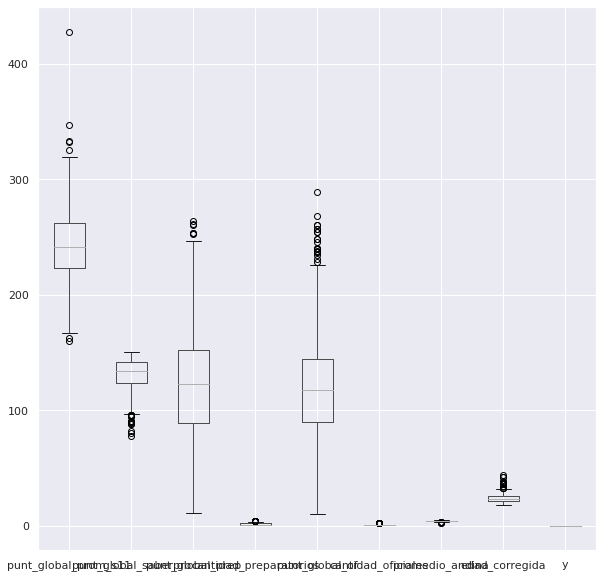

In [ ]:
data_unsup_0.boxplot(figsize=(10,10))

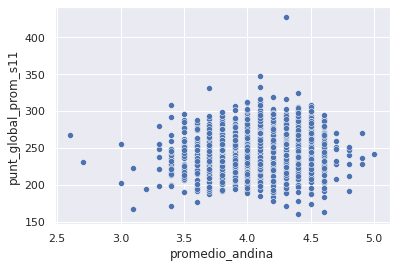

In [ ]:
sns.scatterplot(data=data_unsup_0, x='promedio_andina', y='punt_global_prom_s11')

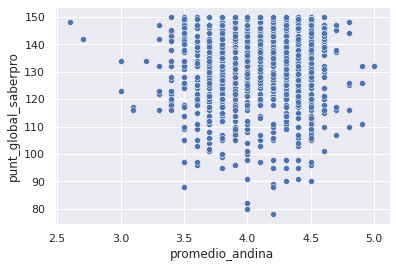

In [ ]:
sns.scatterplot(data=data_unsup_0, x='promedio_andina', y='punt_global_saberpro')

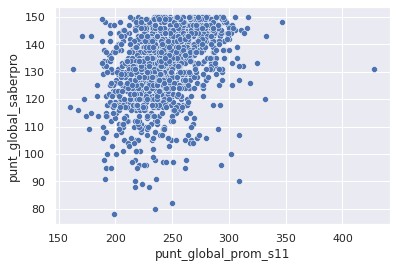

In [ ]:
sns.scatterplot(data=data_unsup_0, x='punt_global_prom_s11', y='punt_global_saberpro')

## Clusterización estudiantes con puntaje SaberPro por debajo de la media nacional

### KMeans

In [ ]:
data_unsup_0.drop(['y',  'edad_corregida', 'cantidad_preparatorios', 'cantidad_oficiales'], axis=1, inplace=True)
data_unsup_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 70 to 15407
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   punt_global_prom_s11     1207 non-null   float64
 1   punt_global_saberpro     1207 non-null   float64
 2   punt_global_prep         1207 non-null   float64
 3   punt_global_of           1207 non-null   float64
 4   ESTU_GENERO              1207 non-null   object 
 5   ESTU_DEPTO_RESIDE        1207 non-null   object 
 6   FAMI_ESTRATOVIVIENDA     1207 non-null   object 
 7   COLE_AREA_UBICACION_S11  1207 non-null   object 
 8   ESTU_PRGM_ACADEMICO      1207 non-null   object 
 9   promedio_andina          1207 non-null   float64
 10  cat_edad                 1207 non-null   object 
dtypes: float64(5), object(6)
memory usage: 113.2+ KB


In [ ]:
data_unsup_0_num=data_unsup_0.select_dtypes(include=['float64']).copy()
data_unsup_0_cat=data_unsup_0.select_dtypes(include=['object']).copy()

In [ ]:
standard_scaler = StandardScaler()

In [ ]:
minmax_scaler= MinMaxScaler()

In [ ]:
data_unsup_0_results=data_unsup_0.copy()

Dado que se cuenta con variables categóricas, se deben de codificar estas antes para ser introducidas en el algoritmo Kmeans

#### One Hot Encoding variables categóricas

In [ ]:
data_unsup_0_ohe=pd.get_dummies(data_unsup_0)

In [ ]:
data_unsup_0_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 70 to 15407
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   punt_global_prom_s11                                        1207 non-null   float64
 1   punt_global_saberpro                                        1207 non-null   float64
 2   punt_global_prep                                            1207 non-null   float64
 3   punt_global_of                                              1207 non-null   float64
 4   promedio_andina                                             1207 non-null   float64
 5   ESTU_GENERO_F                                               1207 non-null   uint8  
 6   ESTU_GENERO_M                                               1207 non-null   uint8  
 7   ESTU_DEPTO_RESIDE_BOGOTÁ                                    1207 non-null   uint8  
 

In [ ]:
scaled_data_unsup_0 = standard_scaler.fit_transform(data_unsup_0_ohe)
scaled_data_unsup_0[:3]

array([[-0.53887526,  0.3288389 , -0.92062358,  0.65948865,  1.23249356,
        -1.5742891 ,  1.5742891 , -0.96178993, -0.31028392, -0.30382181,
         3.1267852 , -0.50852995, -0.22670185, -0.37527558,  1.16706265,
        -0.72520105, -0.25      , -0.14243386, -0.02879561, -0.17281054,
        -0.20350679,  1.99175254, -1.77419456, -0.37671086,  3.36397481,
        -0.17783119, -0.14837534, -0.53807984, -0.2246746 , -0.15965128,
        -0.15126585, -0.23071329, -0.16235931, -0.20350679, -0.1650274 ,
        -0.15690123, -0.26642995, -0.26997942, -0.17281054, -0.18029536,
        -0.25556472, -0.33225831, -1.20138247,  1.49240501],
       [ 0.79915498, -0.59046289,  0.5600312 , -1.15177329,  0.04311141,
        -1.5742891 ,  1.5742891 , -0.96178993, -0.31028392, -0.30382181,
        -0.3198173 ,  1.96645251, -0.22670185, -0.37527558,  1.16706265,
        -0.72520105, -0.25      , -0.14243386, -0.02879561, -0.17281054,
        -0.20350679, -0.5020704 ,  0.56363604, -0.37671086, -0.

In [ ]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=123)
kmeans.fit(scaled_data_unsup_0)

KMeans(init='random', n_clusters=5, random_state=123)

In [ ]:
print('Inercia Kmeans: '+ str(kmeans.inertia_))
print('Centroides clusters Kmeans: '+ str(kmeans.cluster_centers_))
print('Número de iteraciones para converger Kmeans: '+ str(kmeans.n_iter_))
print('Etiquetas Kmeans: '+ str(kmeans.labels_))

Inercia Kmeans: 44743.68453738519
Centroides clusters Kmeans: [[ 4.05762689e-01 -8.23842670e-03 -8.83048541e-03  1.77346997e-01
   1.40139952e-01  1.46792342e-01 -1.46792342e-01 -9.40721321e-01
  -3.10283923e-01 -3.03821810e-01 -3.19817299e-01  1.94040007e+00
  -2.26701849e-01 -7.12771732e-02 -1.75112349e-01  2.78556476e-02
   2.86842105e-01  2.72279818e-01 -2.87956142e-02 -4.73474881e-02
   2.81294581e-01 -4.88945018e-01  3.29852984e-01 -3.76710856e-01
   6.88568334e-02  4.02282986e-01 -1.12122498e-01  4.21351314e-02
  -2.24674603e-01 -1.59651277e-01 -1.51265845e-01  9.55499381e-03
  -1.62359306e-01  1.73560943e-01 -1.65027399e-01  8.36901490e-02
   4.31739209e-01 -2.69979423e-01  1.53840357e-02 -1.80295357e-01
   5.12310932e-01  1.95274620e-02  3.82807084e-01 -4.19668779e-01]
 [ 2.70553758e-01  1.83198594e-01  4.18939141e-02  2.00417090e-01
  -3.48992598e-01  5.24830087e-02 -5.24830087e-02 -9.61789932e-01
  -3.10283923e-01 -3.03821810e-01 -1.30443535e-01  6.33769647e-01
   2.01574214

#### Gráfico del codo

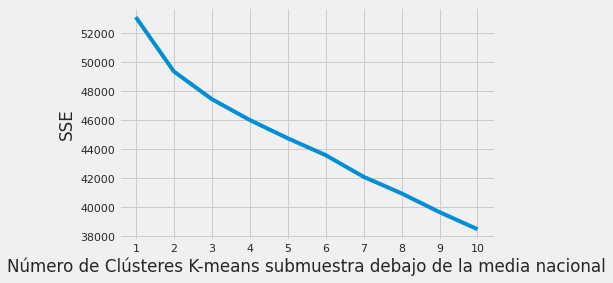

3


In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_data_unsup_0)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clústeres K-means submuestra debajo de la media nacional")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

#### Coeficiente de silueta

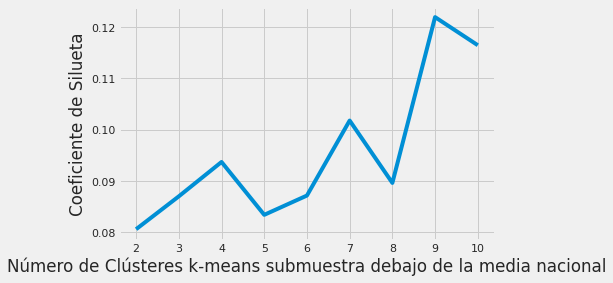

0.11645465793759843


In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_data_unsup_0)
  score = silhouette_score(scaled_data_unsup_0, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de Clústeres k-means submuestra debajo de la media nacional")
plt.ylabel("Coeficiente de Silueta")
plt.show()
print(score)

### Implementación Kmeans

Siguiendo la recomendación de gáfico de codo y del coeficiente de silueta se usa un Kmeans con 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto', random_state=123)
kmeans_clusters=kmeans.fit_predict(scaled_data_unsup_0)
data_unsup_0_results['kmeans_cluster_labels'] = kmeans.labels_

In [ ]:
data_unsup_0_results.head()

punt_global_prom_s11  punt_global_saberpro  ...  cat_edad  kmeans_cluster_labels
70                  227.7                 136.0  ...       >25                      1
102                 266.0                 124.0  ...       >25                      0
264                 217.0                 123.0  ...       >25                      0
321                 232.2                 130.0  ...       >25                      1
441                 212.0                 144.0  ...       >25                      2

[5 rows x 12 columns]

In [ ]:
data_unsup_0_results['kmeans_cluster_labels']=data_unsup_0_results['kmeans_cluster_labels'].astype('object')

   kmeans_cluster_labels  porcentaje
2                    676    0.560066
0                    276    0.228666
1                    255    0.211268


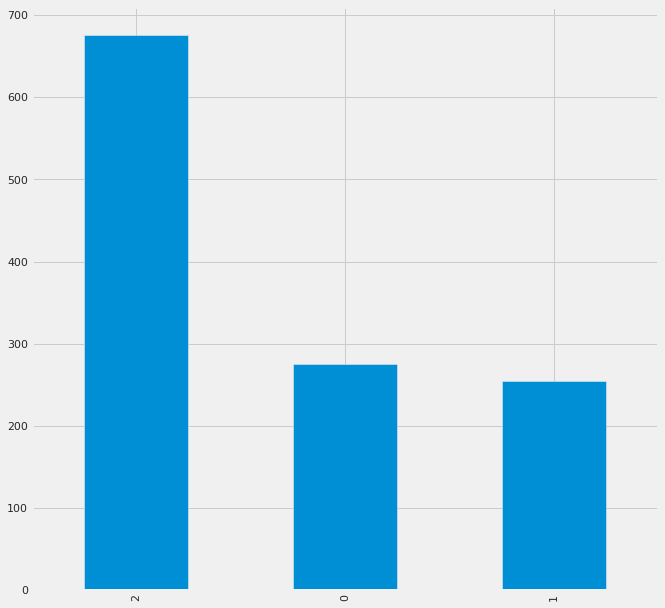

In [ ]:
kmeans_cluster_0=data_unsup_0_results['kmeans_cluster_labels'].value_counts().to_frame('kmeans_cluster_labels')
kmeans_cluster_0['porcentaje']=kmeans_cluster_0['kmeans_cluster_labels']/kmeans_cluster_0['kmeans_cluster_labels'].sum()
print(kmeans_cluster_0)
data_unsup_0_results['kmeans_cluster_labels'].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
kmeans_cluster_0.head(11)

kmeans_cluster_labels  porcentaje
2                    676    0.560066
0                    276    0.228666
1                    255    0.211268

#### Variables numéricas

Se genero este archivo solamente como resutados del documento

In [ ]:
#data_unsup_0_results.groupby('kmeans_cluster_labels').describe().to_csv('k-means3DebajoMedia_df.csv', sep=';', decimal=',')

The `size` parameter has been renamed to `height`; please update your code.


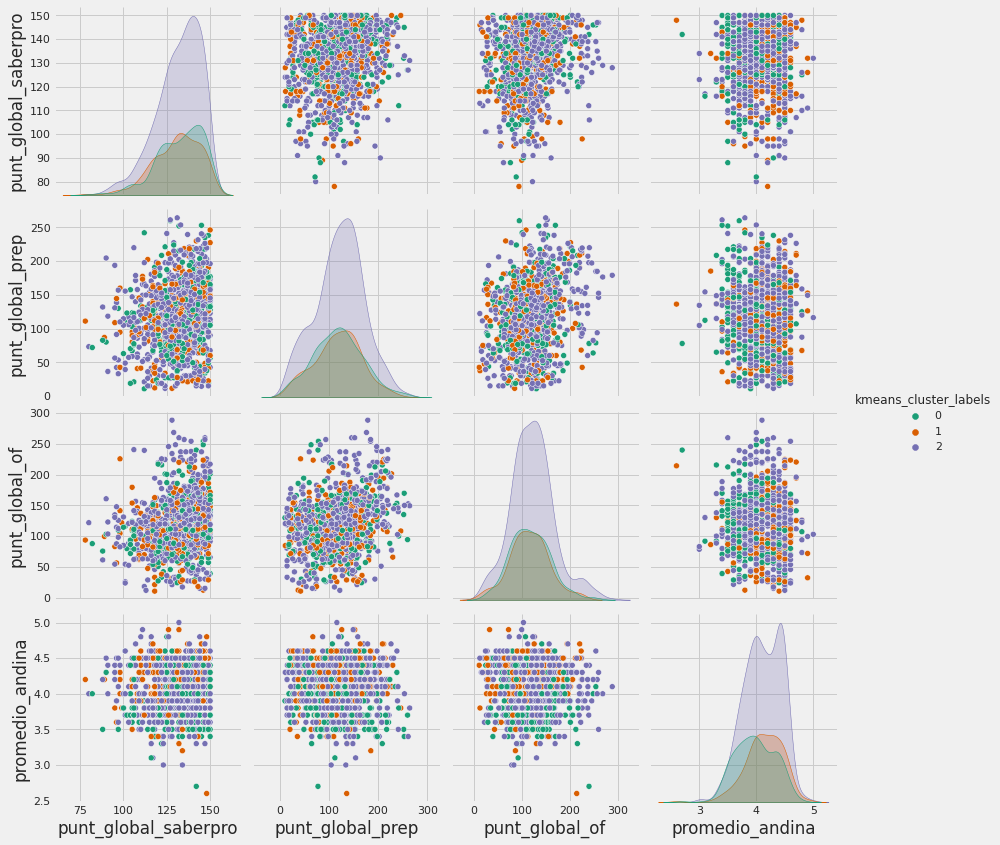

In [ ]:
sns.pairplot(data_unsup_0_results, hue='kmeans_cluster_labels', size=3, vars=['punt_global_saberpro', 'punt_global_prep', 'punt_global_of', 'promedio_andina'],kind='scatter', palette='Dark2')


#### Variables categóricas

In [ ]:
pd.crosstab(index=data_unsup_0_results['cat_edad'],columns=data_unsup_0_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0    1    2
cat_edad                            
18-21                   27    0   93
21-25                  205    1  507
>25                     44  254   76

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

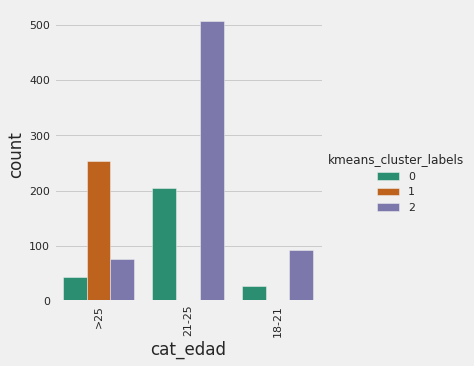

In [ ]:
sns.catplot(x="cat_edad", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["ESTU_DEPTO_RESIDE"],columns=data_unsup_0_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0    1    2
ESTU_DEPTO_RESIDE                   
BOGOTÁ                 134  146  300
CESAR                   34   12   60
CUNDINAMARCA            32   15   55
Otros                   14   40   58
RISARALDA               54   26  168
VALLE                    8   16   35

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

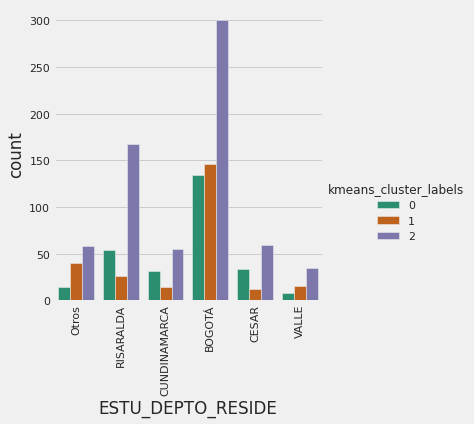

In [ ]:
sns.catplot(x="ESTU_DEPTO_RESIDE", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["ESTU_GENERO"],columns=data_unsup_0_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0    1    2
ESTU_GENERO                         
F                        0  184  676
M                      276   71    0

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

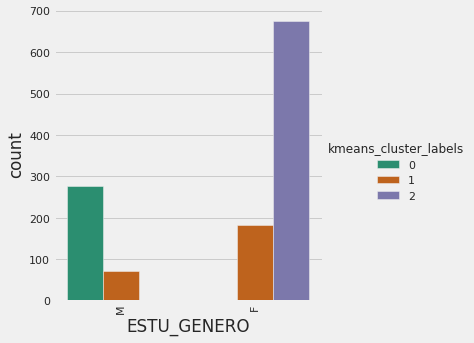

In [ ]:
sns.catplot(x="ESTU_GENERO", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["FAMI_ESTRATOVIVIENDA"],columns=data_unsup_0_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0    1    2
FAMI_ESTRATOVIVIENDA                
Estrato 1               35   40   74
Estrato 2              103  114  294
Estrato 3              107   79  230
Estrato 4               15   12   44
Estrato 5                7    2   15
Estrato 6                1    0    0
Sin Estrato              8    8   19

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

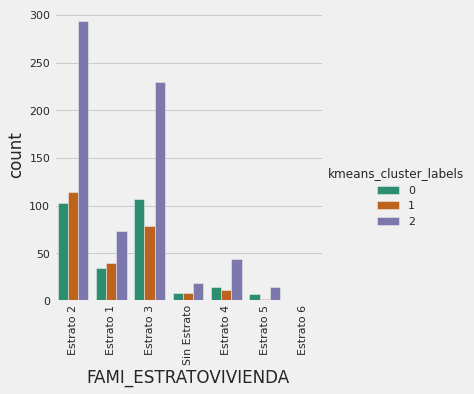

In [ ]:
sns.catplot(x="FAMI_ESTRATOVIVIENDA", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["ESTU_PRGM_ACADEMICO"],columns=data_unsup_0_results['kmeans_cluster_labels'])

kmeans_cluster_labels                    0    1    2
ESTU_PRGM_ACADEMICO                                 
ADMINISTRACION DE EMPRESAS              33   19   98
ADMINISTRACIÓN DE EMPRESAS              14   22   62
CONTADURIA PÚBLICA                       6    5   26
DISEÑO GRAFICO                          13    1   12
ENFERMERIA                              31  100  140
FISIOTERAPIA                            17    6   35
INGENIERIA DE MINAS                     15    5   10
INGENIERÍA CIVIL                        18    1    8
INSTRUMENTACION QUIRURGICA               7    5   49
LICENCIATURA EN PEDAGOGÍA INFANTIL       0   19   12
MERCADEO Y PUBLICIDAD                   13    4   31
NEGOCIOS INTERNACIONALES                 8    2   22
OPTOMETRIA                               5    6   18
Otros                                   25   19   36
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO  58   11   13
PSICOLOGIA                               1   11   23
PSICOLOGÍA                               2    3   33
TERAPIA RESPIRATORIA                    10   16   48

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

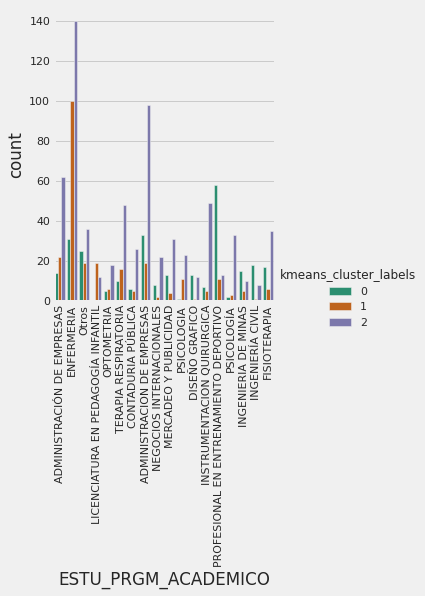

In [ ]:
sns.catplot(x="ESTU_PRGM_ACADEMICO", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["COLE_AREA_UBICACION_S11"],columns=data_unsup_0_results['kmeans_cluster_labels'])

kmeans_cluster_labels      0    1    2
COLE_AREA_UBICACION_S11               
RURAL                     17    8   23
S.I                        0  242    1
URBANO                   259    5  652

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

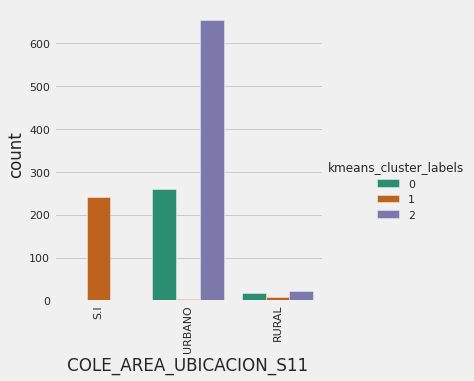

In [ ]:
sns.catplot(x="COLE_AREA_UBICACION_S11", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

El preprocesamiento de las variables categóricas mediante OneHot encoding no da buenos resultados en los algoritmos de cluster. Vease:    . Por tal motivo, se emplearán otras estrategías y modelos para abordar las variables categóricas

#### Gower Matriz de distancia

In [ ]:
#distance_matrix_0=gower.gower_matrix(data_unsup_0)

In [ ]:
'''kmeans_kwargs = {"init": "random","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(distance_matrix_0)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)'''

'kmeans_kwargs = {"init": "random","n_init": 10,\n                "max_iter": 300,\n               "random_state": 123}\nsse = []\nfor k in range(1, 11):\n  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)\n  kmeans.fit(distance_matrix_0)\n  sse.append(kmeans.inertia_)\nplt.style.use("fivethirtyeight")\nplt.plot(range(1, 11), sse)\nplt.xticks(range(1, 11))\nplt.xlabel("Número de Clusters")\nplt.ylabel("SSE")\nplt.show()\nkl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")\nprint(kl.elbow)'

### K-prototype

In [ ]:
categoricalColumnsPosition = [data_unsup_0.columns.get_loc(col) for col in list(data_unsup_0.select_dtypes('object').columns)]
print('Columnas de tipo Categoría           : {}'.format(list(data_unsup_0.select_dtypes('object').columns)))
print('Posición de las Columnas Categóricas : {}'.format(categoricalColumnsPosition))

Columnas de tipo Categoría           : ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'COLE_AREA_UBICACION_S11', 'ESTU_PRGM_ACADEMICO', 'cat_edad']
Posición de las Columnas Categóricas : [4, 5, 6, 7, 8, 10]


In [ ]:
scaled_data_unsup_0_kprototypes=data_unsup_0.copy()
scaled_data_unsup_0_kprototypes[['punt_global_prom_s11','punt_global_prep', 'punt_global_of',
                        'promedio_andina']]=standard_scaler.fit_transform(scaled_data_unsup_0_kprototypes[['punt_global_prom_s11','punt_global_prep', 'punt_global_of',
                        'promedio_andina']])
scaled_data_unsup_0_kprototypes_num=scaled_data_unsup_0_kprototypes[['punt_global_prom_s11','punt_global_prep', 'punt_global_of',
                        'promedio_andina']].copy()

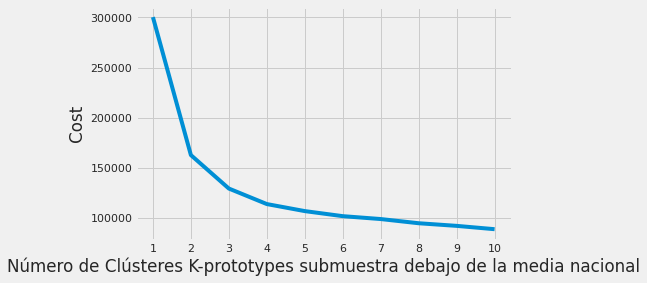

3


In [ ]:
kprototypes_kwargs = {"init": "Cao","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
cost = []
for k in range(1, 11):
  kprototypes = KPrototypes(n_clusters=k, n_jobs= -1,  **kmeans_kwargs)
  kprototypes.fit(scaled_data_unsup_0_kprototypes, categorical=categoricalColumnsPosition)
  cost.append(kprototypes.cost_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), cost)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clústeres K-prototypes submuestra debajo de la media nacional")
plt.ylabel("Cost")
plt.show()
kl = KneeLocator(range(1, 11), cost, curve="convex", direction="decreasing")
print(kl.elbow)

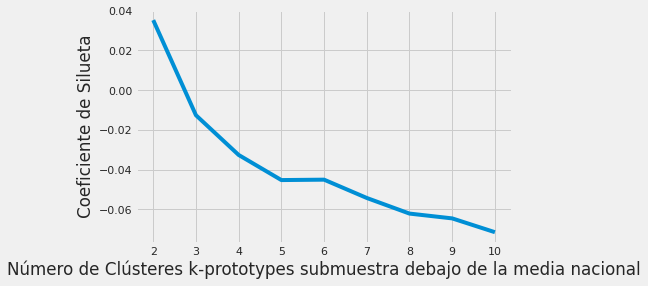

-0.07150302482069906


In [ ]:
kprototypes_kwargs = {"init": "Cao","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
silhouette_coefficients = []
for k in range(2, 11):
  kprototypes = KPrototypes(n_clusters=k, n_jobs= -1,  **kprototypes_kwargs)
  kprototypes.fit(scaled_data_unsup_0_kprototypes, categorical=categoricalColumnsPosition)
  score = silhouette_score(scaled_data_unsup_0_kprototypes_num, kprototypes.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de Clústeres k-prototypes submuestra debajo de la media nacional")
plt.ylabel("Coeficiente de Silueta")
plt.show()
print(score)

In [ ]:
kprototypes = KPrototypes(n_clusters=3, n_jobs=-1,  init='Cao', random_state=123)
kprototypes_clusters = kprototypes.fit_predict(scaled_data_unsup_0_kprototypes, categorical=categoricalColumnsPosition)
data_unsup_0_results['k_prototypes_cluster_labels']=kprototypes.labels_

In [ ]:
data_unsup_0_results.head()

punt_global_prom_s11  ...  k_prototypes_cluster_labels
70                  227.7  ...                            1
102                 266.0  ...                            1
264                 217.0  ...                            1
321                 232.2  ...                            1
441                 212.0  ...                            0

[5 rows x 13 columns]

In [ ]:
data_unsup_0_results['k_prototypes_cluster_labels']=data_unsup_0_results['k_prototypes_cluster_labels'].astype('object')

In [ ]:
data_unsup_0_results.to_csv('data_debajo_media.csv', sep=';', index=False)

   k_prototypes_cluster_labels  porcentaje
0                          512    0.424192
1                          459    0.380282
2                          236    0.195526


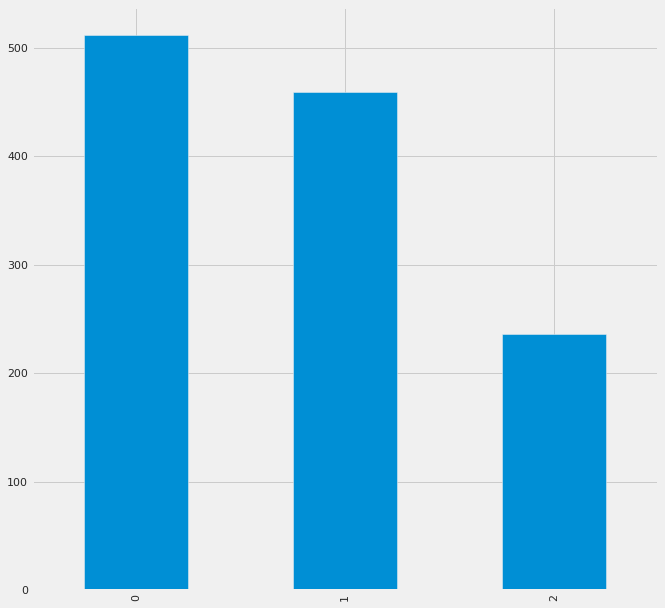

In [ ]:
kprototype_cluster_0=data_unsup_0_results['k_prototypes_cluster_labels'].value_counts().to_frame('k_prototypes_cluster_labels')
kprototype_cluster_0['porcentaje']=kprototype_cluster_0['k_prototypes_cluster_labels']/kprototype_cluster_0['k_prototypes_cluster_labels'].sum()
print(kprototype_cluster_0)
data_unsup_0_results['k_prototypes_cluster_labels'].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
kprototype_cluster_0.head()

k_prototypes_cluster_labels  porcentaje
0                          512    0.424192
1                          459    0.380282
2                          236    0.195526

#### Variables numéricas

Se genero este archivo para resutados del documento

In [ ]:
#data_unsup_0_results.groupby('k_prototypes_cluster_labels').describe().to_csv('k-prototypes3DebajoMedia_df.csv', sep=';', decimal=',')

The `size` parameter has been renamed to `height`; please update your code.


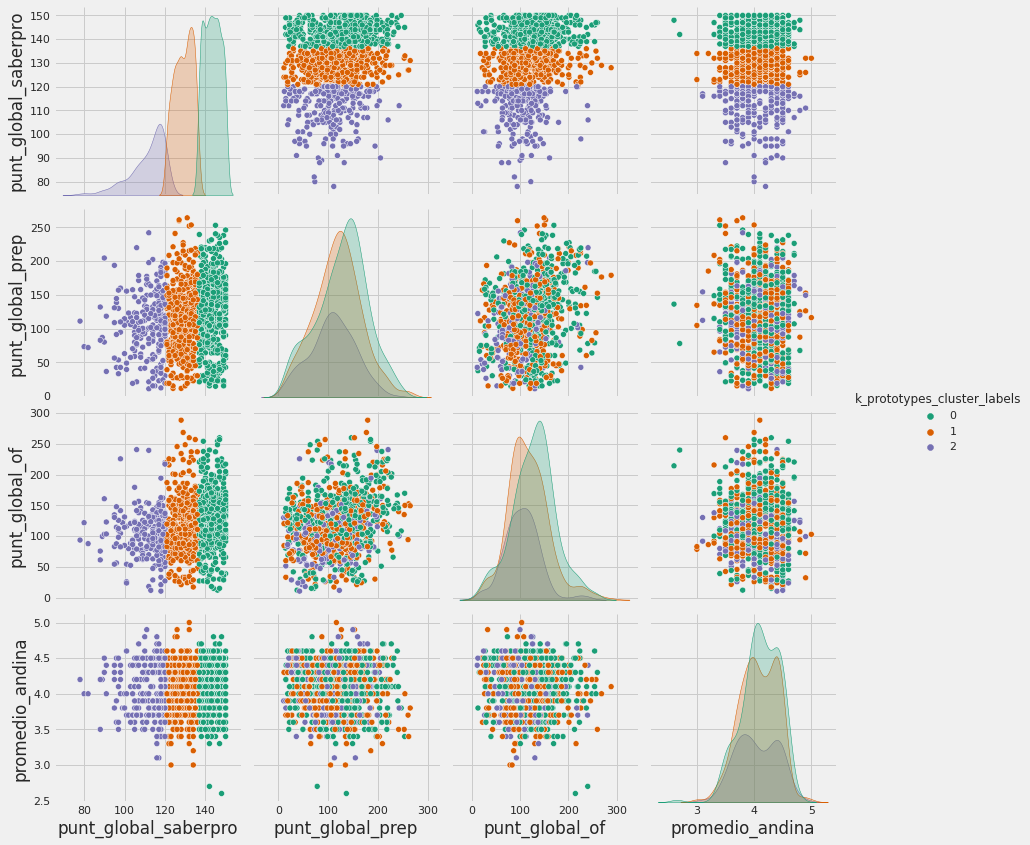

In [ ]:
sns.pairplot(data_unsup_0_results, hue='k_prototypes_cluster_labels', size=3, vars=['punt_global_saberpro', 'punt_global_prep', 'punt_global_of', 'promedio_andina'],kind='scatter', palette='Dark2')

#### Variables categóricas

In [ ]:
pd.crosstab(index=data_unsup_0_results['cat_edad'],columns=data_unsup_0_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0    1    2
cat_edad                                  
18-21                         68   37   15
21-25                        308  271  134
>25                          136  151   87

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

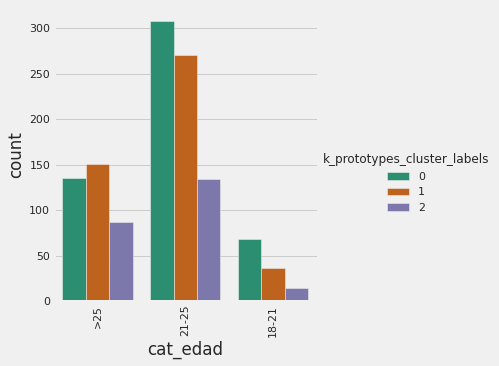

In [ ]:
sns.catplot(x="cat_edad", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["ESTU_DEPTO_RESIDE"],columns=data_unsup_0_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0    1    2
ESTU_DEPTO_RESIDE                         
BOGOTÁ                       242  219  119
CESAR                         49   39   18
CUNDINAMARCA                  48   37   17
Otros                         35   48   29
RISARALDA                    113   91   44
VALLE                         25   25    9

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

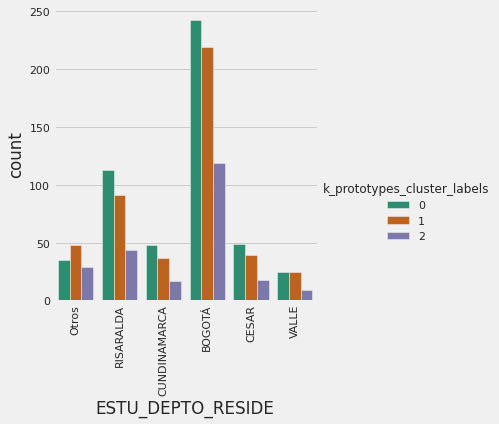

In [ ]:
sns.catplot(x="ESTU_DEPTO_RESIDE", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["ESTU_GENERO"],columns=data_unsup_0_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0    1    2
ESTU_GENERO                               
F                            353  333  174
M                            159  126   62

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

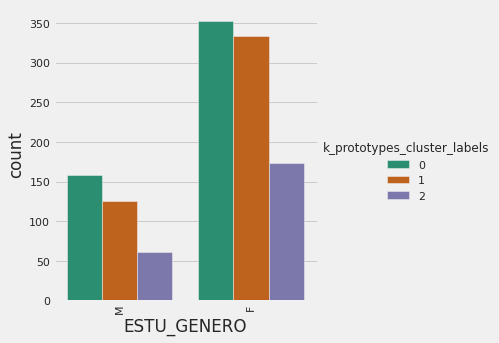

In [ ]:
sns.catplot(x="ESTU_GENERO", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["FAMI_ESTRATOVIVIENDA"],columns=data_unsup_0_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0    1    2
FAMI_ESTRATOVIVIENDA                      
Estrato 1                     51   63   35
Estrato 2                    212  185  114
Estrato 3                    197  151   68
Estrato 4                     27   35    9
Estrato 5                     12   11    1
Estrato 6                      1    0    0
Sin Estrato                   12   14    9

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

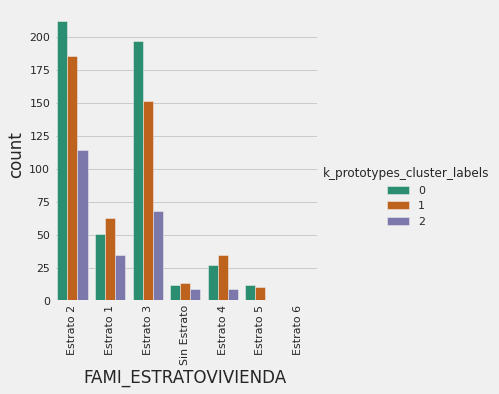

In [ ]:
sns.catplot(x="FAMI_ESTRATOVIVIENDA", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["ESTU_PRGM_ACADEMICO"],columns=data_unsup_0_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels               0    1   2
ESTU_PRGM_ACADEMICO                                 
ADMINISTRACION DE EMPRESAS               56   67  27
ADMINISTRACIÓN DE EMPRESAS               37   35  26
CONTADURIA PÚBLICA                       21    8   8
DISEÑO GRAFICO                           15    8   3
ENFERMERIA                              109  109  53
FISIOTERAPIA                             31   20   7
INGENIERIA DE MINAS                      19    9   2
INGENIERÍA CIVIL                         20    6   1
INSTRUMENTACION QUIRURGICA               24   26  11
LICENCIATURA EN PEDAGOGÍA INFANTIL        8   14   9
MERCADEO Y PUBLICIDAD                    28   16   4
NEGOCIOS INTERNACIONALES                 14   13   5
OPTOMETRIA                               11   10   8
Otros                                    35   32  13
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO   24   34  24
PSICOLOGIA                               16   13   6
PSICOLOGÍA                               12   17   9
TERAPIA RESPIRATORIA                     32   22  20

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

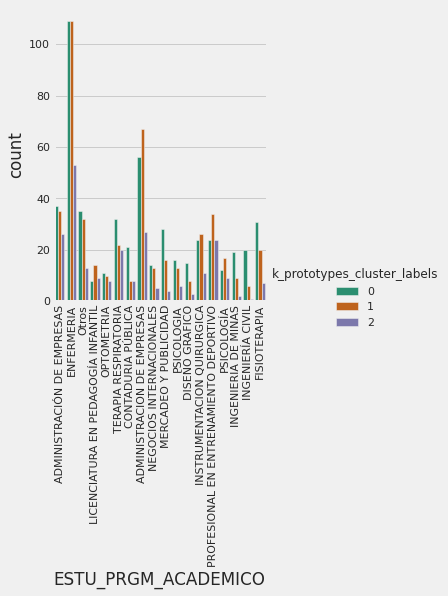

In [ ]:
sns.catplot(x="ESTU_PRGM_ACADEMICO", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_0_results["COLE_AREA_UBICACION_S11"],columns=data_unsup_0_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0    1    2
COLE_AREA_UBICACION_S11                   
RURAL                         24   16    8
S.I                           92   96   55
URBANO                       396  347  173

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

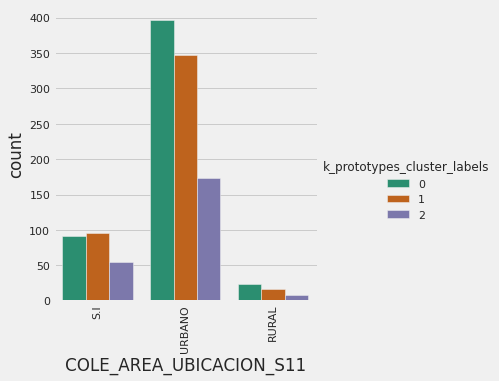

In [ ]:
sns.catplot(x="COLE_AREA_UBICACION_S11", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_0_results, palette='Dark2')
plt.xticks( rotation=90)

Se genera archivo con las etiquetas de Cluster dada por ambos algoritmos para la submuestra por debajo de la media nacional

In [ ]:
unsup_file_name_1='cluster_debajo_media.csv'

In [ ]:
data_unsup_0_results.to_csv(os.path.join(path, unsup_file_name_1), sep=';', index=False)

## II. Estudiantes con puntaje SaberPro por encima de la media nacional

In [ ]:
data_unsup_1.head()

punt_global_prom_s11  punt_global_saberpro  ...  cat_edad  y
728                  201.0                 172.0  ...       >25  1
1645                 181.9                 155.0  ...       >25  1
1952                 182.0                 167.0  ...       >25  1
2102                 314.0                 158.0  ...     18-21  1
2152                 315.0                 167.0  ...     18-21  1

[5 rows x 15 columns]

In [ ]:
data_unsup_1.shape

(677, 15)

   ESTU_GENERO  porcentaje
F          438    0.646972
M          239    0.353028


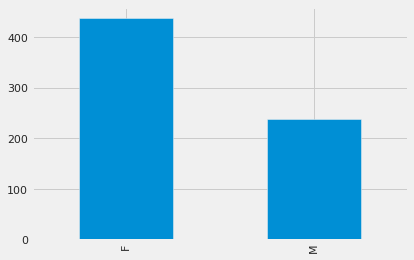

In [ ]:
genero_1=data_unsup_1['ESTU_GENERO'].value_counts().to_frame('ESTU_GENERO')
genero_1['porcentaje']=genero_1['ESTU_GENERO']/genero_1['ESTU_GENERO'].sum()
print(genero_1)
data_unsup_1['ESTU_GENERO'].value_counts().plot(kind='bar')

In [ ]:
genero_1.head()

ESTU_GENERO  porcentaje
F          438    0.646972
M          239    0.353028

                  ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                          298    0.440177
RISARALDA                       175    0.258493
CESAR                            87    0.128508
CUNDINAMARCA                     48    0.070901
VALLE                            24    0.035451
LA GUAJIRA                        9    0.013294
CALDAS                            7    0.010340
QUINDIO                           6    0.008863
NARIÑO                            5    0.007386
MAGDALENA                         3    0.004431
BOYACA                            3    0.004431
TOLIMA                            3    0.004431
BOLIVAR                           2    0.002954
SAN ANDRES                        2    0.002954
Sin Departamento                  1    0.001477
SUCRE                             1    0.001477
META                              1    0.001477
ANTIOQUIA                         1    0.001477
ATLANTICO                         1    0.001477


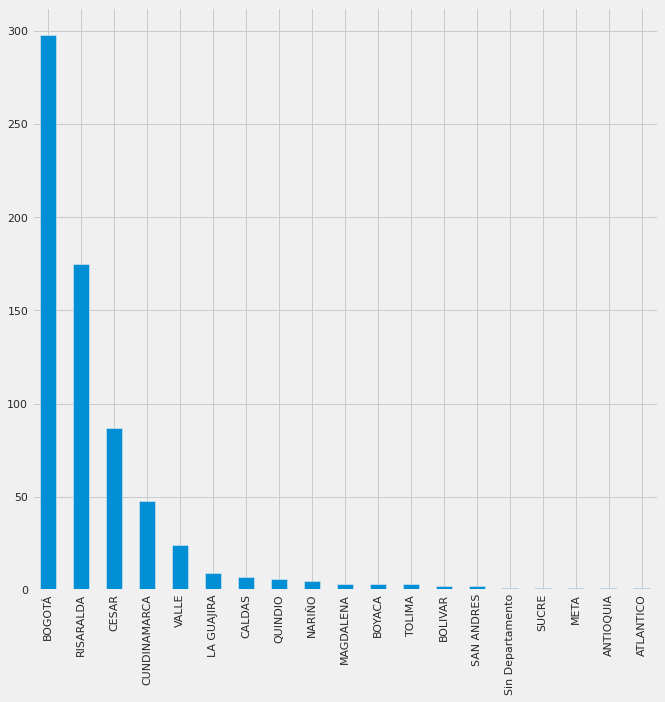

In [ ]:
depto_1=data_unsup_1['ESTU_DEPTO_RESIDE'].value_counts().to_frame('ESTU_DEPTO_RESIDE')
depto_1['porcentaje']=depto_1['ESTU_DEPTO_RESIDE']/depto_1['ESTU_DEPTO_RESIDE'].sum()
print(depto_1)
data_unsup_1['ESTU_DEPTO_RESIDE'].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
depto_1.head(20)

ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                          298    0.440177
RISARALDA                       175    0.258493
CESAR                            87    0.128508
CUNDINAMARCA                     48    0.070901
VALLE                            24    0.035451
LA GUAJIRA                        9    0.013294
CALDAS                            7    0.010340
QUINDIO                           6    0.008863
NARIÑO                            5    0.007386
MAGDALENA                         3    0.004431
BOYACA                            3    0.004431
TOLIMA                            3    0.004431
BOLIVAR                           2    0.002954
SAN ANDRES                        2    0.002954
Sin Departamento                  1    0.001477
SUCRE                             1    0.001477
META                              1    0.001477
ANTIOQUIA                         1    0.001477
ATLANTICO                         1    0.001477

Hay departamentos que concentran poca cantidad de estudiantes. Se agrupan todos los departamentos que tengan menos del 4% de las observaciones del total

              ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                      298    0.440177
RISARALDA                   175    0.258493
CESAR                        87    0.128508
Otros                        69    0.101920
CUNDINAMARCA                 48    0.070901



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


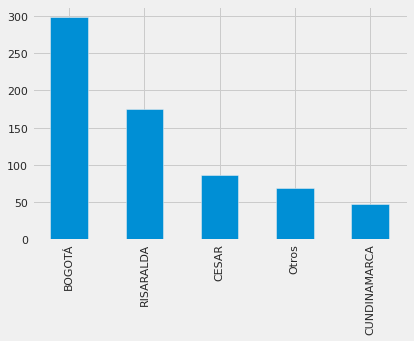

In [ ]:
data_unsup_1.loc[data_unsup_1['ESTU_DEPTO_RESIDE'].isin((data_unsup_1['ESTU_DEPTO_RESIDE'].value_counts()[data_unsup_1['ESTU_DEPTO_RESIDE'].value_counts(normalize=True) < 0.04]).index), 'ESTU_DEPTO_RESIDE'] = 'Otros'
depto_1=data_unsup_1['ESTU_DEPTO_RESIDE'].value_counts().to_frame('ESTU_DEPTO_RESIDE')
depto_1['porcentaje']=depto_1['ESTU_DEPTO_RESIDE']/depto_1['ESTU_DEPTO_RESIDE'].sum()
print(depto_1)
data_unsup_1['ESTU_DEPTO_RESIDE'].value_counts().plot(kind='bar')

In [ ]:
depto_1.head()

ESTU_DEPTO_RESIDE  porcentaje
BOGOTÁ                      298    0.440177
RISARALDA                   175    0.258493
CESAR                        87    0.128508
Otros                        69    0.101920
CUNDINAMARCA                 48    0.070901

             FAMI_ESTRATOVIVIENDA  porcentaje
Estrato 3                     281    0.415066
Estrato 2                     231    0.341211
Estrato 4                      62    0.091581
Estrato 1                      60    0.088626
Estrato 5                      25    0.036928
Sin Estrato                    15    0.022157
Estrato 6                       3    0.004431


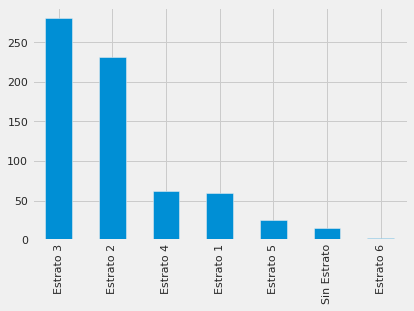

In [ ]:
estrato_1=data_unsup_1['FAMI_ESTRATOVIVIENDA'].value_counts().to_frame('FAMI_ESTRATOVIVIENDA')
estrato_1['porcentaje']=estrato_1['FAMI_ESTRATOVIVIENDA']/estrato_1['FAMI_ESTRATOVIVIENDA'].sum()
print(estrato_1)
data_unsup_1['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [ ]:
estrato_1.head(7)

FAMI_ESTRATOVIVIENDA  porcentaje
Estrato 3                     281    0.415066
Estrato 2                     231    0.341211
Estrato 4                      62    0.091581
Estrato 1                      60    0.088626
Estrato 5                      25    0.036928
Sin Estrato                    15    0.022157
Estrato 6                       3    0.004431

       cat_edad  porcentaje
21-25       412    0.608567
18-21       145    0.214180
>25         120    0.177253


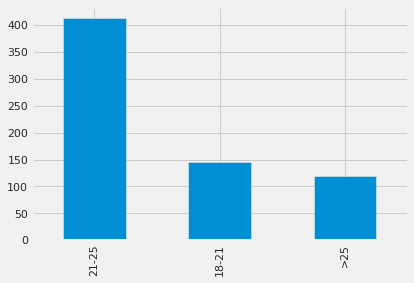

In [ ]:
edad_1=data_unsup_1['cat_edad'].value_counts().to_frame('cat_edad')
edad_1['porcentaje']=edad_1['cat_edad']/edad_1['cat_edad'].sum()
print(edad_1)
data_unsup_1['cat_edad'].value_counts().plot(kind='bar')

In [ ]:
edad_1.head()

cat_edad  porcentaje
21-25       412    0.608567
18-21       145    0.214180
>25         120    0.177253

        COLE_AREA_UBICACION_S11  porcentaje
URBANO                      556    0.821270
S.I                          85    0.125554
RURAL                        36    0.053176


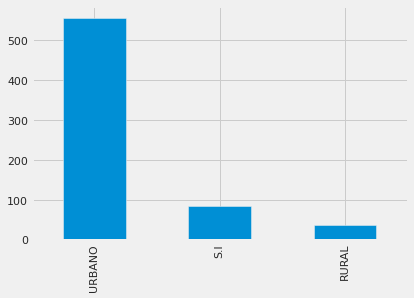

In [ ]:
colegio_1=data_unsup_1['COLE_AREA_UBICACION_S11'].value_counts().to_frame('COLE_AREA_UBICACION_S11')
colegio_1['porcentaje']=colegio_1['COLE_AREA_UBICACION_S11']/colegio_1['COLE_AREA_UBICACION_S11'].sum()
print(colegio_1)
data_unsup_1['COLE_AREA_UBICACION_S11'].value_counts().plot(kind='bar')

In [ ]:
colegio_1.head()

COLE_AREA_UBICACION_S11  porcentaje
URBANO                      556    0.821270
S.I                          85    0.125554
RURAL                        36    0.053176

                                            ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                                   84    0.124077
ADMINISTRACION DE EMPRESAS                                   64    0.094535
ADMINISTRACIÓN DE EMPRESAS                                   47    0.069424
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                       45    0.066470
MERCADEO Y PUBLICIDAD                                        43    0.063516
FISIOTERAPIA                                                 40    0.059084
NEGOCIOS INTERNACIONALES                                     35    0.051699
INGENIERIA DE MINAS                                          31    0.045790
PSICOLOGIA                                                   31    0.045790
INSTRUMENTACION QUIRURGICA                                   30    0.044313
CONTADURIA PÚBLICA                                           28    0.041359
TERAPIA RESPIRATORIA                                         27    0.039882
OPTOMETRIA  

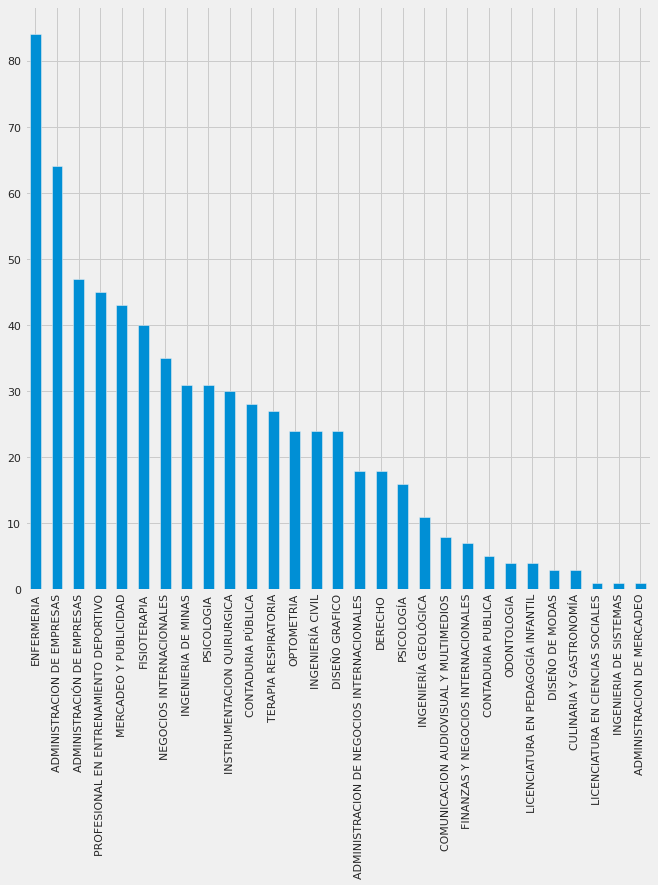

In [ ]:
programa_1=data_unsup_1["ESTU_PRGM_ACADEMICO"].value_counts().to_frame("ESTU_PRGM_ACADEMICO")
programa_1['porcentaje']=programa_1["ESTU_PRGM_ACADEMICO"]/programa_1["ESTU_PRGM_ACADEMICO"].sum()
print(programa_1)
data_unsup_1["ESTU_PRGM_ACADEMICO"].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
programa_1.head(20)

ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                                   84    0.124077
ADMINISTRACION DE EMPRESAS                                   64    0.094535
ADMINISTRACIÓN DE EMPRESAS                                   47    0.069424
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                       45    0.066470
MERCADEO Y PUBLICIDAD                                        43    0.063516
FISIOTERAPIA                                                 40    0.059084
NEGOCIOS INTERNACIONALES                                     35    0.051699
INGENIERIA DE MINAS                                          31    0.045790
PSICOLOGIA                                                   31    0.045790
INSTRUMENTACION QUIRURGICA                                   30    0.044313
CONTADURIA PÚBLICA                                           28    0.041359
TERAPIA RESPIRATORIA                                         27    0.039882
OPTOMETRIA                                                   24    0.035451
INGENIERÍA CIVIL                                             24    0.035451
DISEÑO GRAFICO                                               24    0.035451
ADMINISTRACION DE NEGOCIOS INTERNACIONALES                   18    0.026588
DERECHO                                                      18    0.026588
PSICOLOGÍA                                                   16    0.023634
INGENIERÍA GEOLÓGICA                                         11    0.016248
COMUNICACION AUDIOVISUAL Y MULTIMEDIOS                        8    0.011817

Hay programas académicos que concentran poca cantidad de estudiantes. Se agrupan todos los programas académicos que tengan menos del 4% de las observaciones del total

                                            ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                                   84    0.124077
ADMINISTRACION DE EMPRESAS                                   64    0.094535
Otros                                                        64    0.094535
ADMINISTRACIÓN DE EMPRESAS                                   47    0.069424
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                       45    0.066470
MERCADEO Y PUBLICIDAD                                        43    0.063516
FISIOTERAPIA                                                 40    0.059084
NEGOCIOS INTERNACIONALES                                     35    0.051699
INGENIERIA DE MINAS                                          31    0.045790
PSICOLOGIA                                                   31    0.045790
INSTRUMENTACION QUIRURGICA                                   30    0.044313
CONTADURIA PÚBLICA                                           28    0.041359
TERAPIA RESP


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


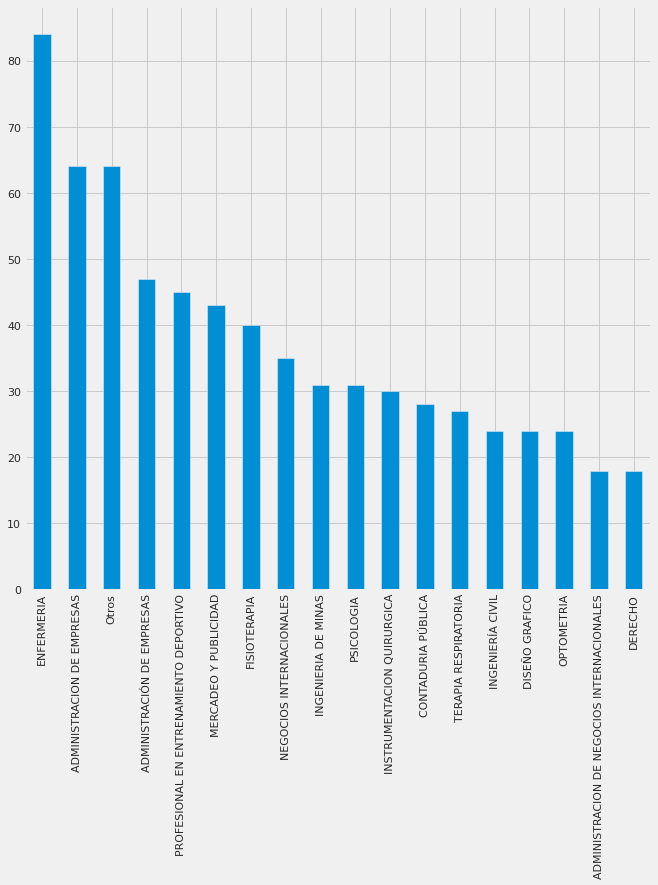

In [ ]:
data_unsup_1.loc[data_unsup_1["ESTU_PRGM_ACADEMICO"].isin((data_unsup_1["ESTU_PRGM_ACADEMICO"].value_counts()[data_unsup_1["ESTU_PRGM_ACADEMICO"].value_counts(normalize=True) < 0.025]).index), "ESTU_PRGM_ACADEMICO"] = 'Otros'
programa_1=data_unsup_1["ESTU_PRGM_ACADEMICO"].value_counts().to_frame("ESTU_PRGM_ACADEMICO")
programa_1['porcentaje']=programa_1["ESTU_PRGM_ACADEMICO"]/programa_1["ESTU_PRGM_ACADEMICO"].sum()
print(programa_1)
data_unsup_1["ESTU_PRGM_ACADEMICO"].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
programa_1.head(18)

ESTU_PRGM_ACADEMICO  porcentaje
ENFERMERIA                                                   84    0.124077
ADMINISTRACION DE EMPRESAS                                   64    0.094535
Otros                                                        64    0.094535
ADMINISTRACIÓN DE EMPRESAS                                   47    0.069424
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO                       45    0.066470
MERCADEO Y PUBLICIDAD                                        43    0.063516
FISIOTERAPIA                                                 40    0.059084
NEGOCIOS INTERNACIONALES                                     35    0.051699
INGENIERIA DE MINAS                                          31    0.045790
PSICOLOGIA                                                   31    0.045790
INSTRUMENTACION QUIRURGICA                                   30    0.044313
CONTADURIA PÚBLICA                                           28    0.041359
TERAPIA RESPIRATORIA                                         27    0.039882
INGENIERÍA CIVIL                                             24    0.035451
DISEÑO GRAFICO                                               24    0.035451
OPTOMETRIA                                                   24    0.035451
ADMINISTRACION DE NEGOCIOS INTERNACIONALES                   18    0.026588
DERECHO                                                      18    0.026588

In [ ]:
data_unsup_1.describe().T

count        mean        std  ...    50%    75%    max
punt_global_prom_s11    677.0  284.046233  33.102491  ...  285.0  305.0  395.0
punt_global_saberpro    677.0  162.781388  10.357918  ...  161.0  168.0  220.0
punt_global_prep        677.0  150.783604  54.852406  ...  159.5  188.8  290.9
cantidad_preparatorios  677.0    1.530281   0.756265  ...    1.0    2.0    4.0
punt_global_of          677.0  153.092171  46.453224  ...  157.8  179.0  288.6
cantidad_oficiales      677.0    1.051699   0.228160  ...    1.0    1.0    3.0
promedio_andina         677.0    4.191433   0.315549  ...    4.2    4.4    5.0
edad_corregida          677.0   22.552437   3.048277  ...   22.0   23.0   50.0
y                       677.0    1.000000   0.000000  ...    1.0    1.0    1.0

[9 rows x 8 columns]

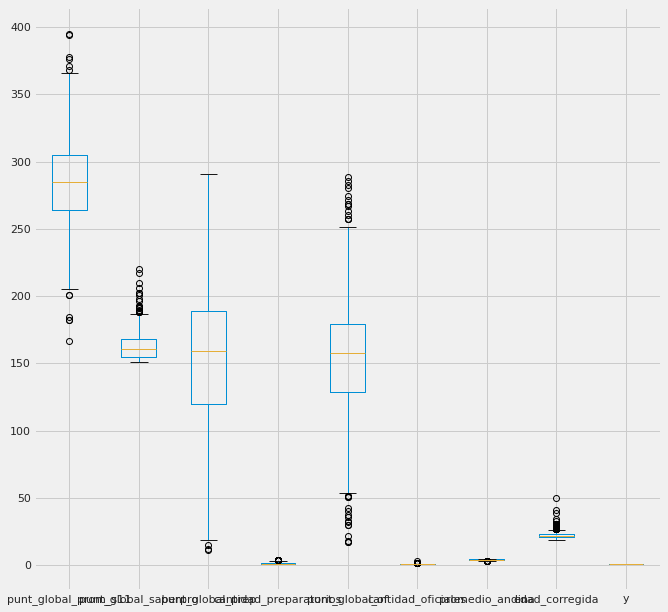

In [ ]:
data_unsup_1.boxplot(figsize=(10,10))

## Clusterización estudiantes con puntaje SaberPro por encima de la media nacional

### KMeans

In [ ]:
data_unsup_1.drop(['y',  'edad_corregida', 'cantidad_preparatorios', 'cantidad_oficiales'], axis=1, inplace=True)
data_unsup_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 728 to 15434
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   punt_global_prom_s11     677 non-null    float64
 1   punt_global_saberpro     677 non-null    float64
 2   punt_global_prep         677 non-null    float64
 3   punt_global_of           677 non-null    float64
 4   ESTU_GENERO              677 non-null    object 
 5   ESTU_DEPTO_RESIDE        677 non-null    object 
 6   FAMI_ESTRATOVIVIENDA     677 non-null    object 
 7   COLE_AREA_UBICACION_S11  677 non-null    object 
 8   ESTU_PRGM_ACADEMICO      677 non-null    object 
 9   promedio_andina          677 non-null    float64
 10  cat_edad                 677 non-null    object 
dtypes: float64(5), object(6)
memory usage: 63.5+ KB



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data_unsup_1_num=data_unsup_1.select_dtypes(include=['float64']).copy()
data_unsup_1_cat=data_unsup_1.select_dtypes(include=['object']).copy()

In [ ]:
data_unsup_1_results=data_unsup_1.copy()

In [ ]:
standard_scaler = StandardScaler()
minmax_scaler= MinMaxScaler()

Dado que se cuenta con variables categóricas, se deben de codificar estas antes para ser introducidas en el algoritmo Kmeans

#### One Hot Encoding variables categóricas

In [ ]:
data_unsup_1_ohe=pd.get_dummies(data_unsup_1)

In [ ]:
data_unsup_1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 728 to 15434
Data columns (total 43 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   punt_global_prom_s11                                            677 non-null    float64
 1   punt_global_saberpro                                            677 non-null    float64
 2   punt_global_prep                                                677 non-null    float64
 3   punt_global_of                                                  677 non-null    float64
 4   promedio_andina                                                 677 non-null    float64
 5   ESTU_GENERO_F                                                   677 non-null    uint8  
 6   ESTU_GENERO_M                                                   677 non-null    uint8  
 7   ESTU_DEPTO_RESIDE_BOGOTÁ                         

In [ ]:
scaled_data_unsup_1 = standard_scaler.fit_transform(data_unsup_1_ohe)
scaled_data_unsup_1[:3]

array([[-2.51061578,  0.8906643 ,  0.751961  , -1.82021041,  1.29573755,
         0.73868945, -0.73868945, -0.88672413, -0.38400212, -0.27624555,
        -0.33687808,  1.69368575, -0.31184088, -0.71967855,  1.18711948,
        -0.31751064, -0.19581511, -0.0667161 , -0.15052777, -0.23698575,
        -0.37892094,  0.46650391, -0.32311696, -0.16526982, -0.27313582,
        -0.20770965, -0.16526982, -0.19171188, -0.37636766, -0.25058801,
        -0.21906076, -0.19171188, -0.21533196, -0.26042915, -0.23348904,
        -0.19171188,  3.0948546 , -0.26683803, -0.21906076, -0.20380987,
        -0.52206934, -1.24688291,  2.15445275],
       [-3.08803826, -0.75180573, -1.16368212, -0.18079211,  1.61287939,
        -1.35374886,  1.35374886,  1.12774646, -0.38400212, -0.27624555,
        -0.33687808, -0.5904283 , -0.31184088, -0.71967855,  1.18711948,
        -0.31751064, -0.19581511, -0.0667161 , -0.15052777, -0.23698575,
         2.63907292, -2.14360475, -0.32311696, -0.16526982,  3.66118223,
   

In [ ]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=123)
kmeans.fit(scaled_data_unsup_1)

KMeans(init='random', n_clusters=5, random_state=123)

In [ ]:
print('Inercia Kmeans: '+ str(kmeans.inertia_))
print('Centroides clusters Kmeans: '+ str(kmeans.cluster_centers_))
print('Número de iteraciones para converger Kmeans: '+ str(kmeans.n_iter_))
print('Etiquetas Kmeans: '+ str(kmeans.labels_))

Inercia Kmeans: 24009.54145278634
Centroides clusters Kmeans: [[ 1.91011104e-01 -2.43837468e-02  3.97701577e-02 -4.83213608e-02
   1.64634411e-01  1.38809523e-01 -1.38809523e-01  6.94600907e-01
  -3.84002119e-01  1.09386482e-01  4.66733693e-02 -5.90428300e-01
  -5.96542019e-02  1.44152625e-01  9.96428160e-02 -2.11015413e-01
  -1.41521530e-01 -6.67161043e-02 -5.77793748e-02 -5.44608895e-02
  -3.78920943e-01  3.59605263e-01  2.13492912e-01 -1.65269817e-01
  -1.80093909e-02 -1.04867547e-01 -1.65269817e-01  2.97709578e-02
   6.68262094e-03 -2.50588006e-01 -2.19060759e-01 -1.91711882e-01
   1.32947273e-01  6.14330854e-02  3.06006120e-01  4.82278611e-02
  -1.94797205e-01  2.67505879e-01  1.07492437e-01 -1.19539600e-02
   1.85062121e-01  1.02722510e-01 -3.30096575e-01]
 [ 2.68328121e-01  2.34642450e-01  3.18441842e-01  3.59828160e-01
  -8.70341199e-01 -2.86605324e-01  2.86605324e-01 -5.64408836e-01
   1.67782443e+00 -8.14348871e-02 -6.34697836e-03 -5.90428300e-01
   4.62252127e-01 -1.71289727

#### Gráfico de codo

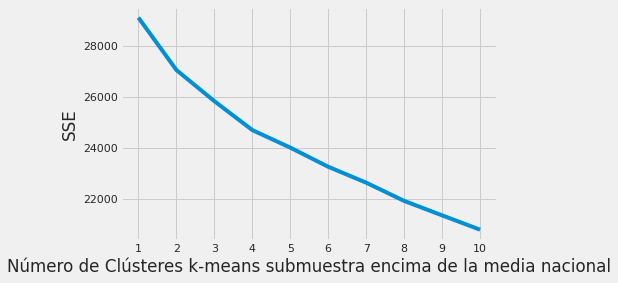

4


In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_data_unsup_1)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clústeres k-means submuestra encima de la media nacional")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

#### Coeficiente de silueta

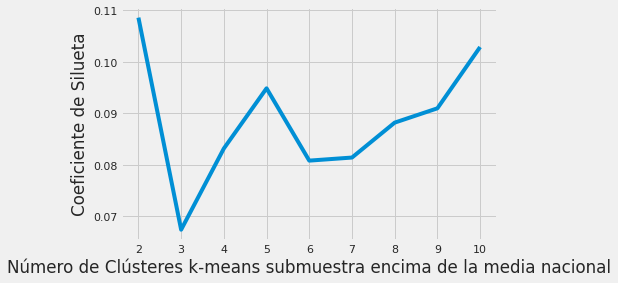

0.10285512393026895


In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_data_unsup_1)
  score = silhouette_score(scaled_data_unsup_1, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de Clústeres k-means submuestra encima de la media nacional")
plt.ylabel("Coeficiente de Silueta")
plt.show()
print(score)

### Implementación Kmeans

Siguiendo la recomendación de gáfico de codo y del coeficiente de silueta se usa un Kmeans con 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto', random_state=123)
kmeans_clusters=kmeans.fit_predict(scaled_data_unsup_1)
data_unsup_1_results['kmeans_cluster_labels'] = kmeans.labels_

In [ ]:
data_unsup_1_results.head()

punt_global_prom_s11  ...  kmeans_cluster_labels
728                  201.0  ...                      3
1645                 181.9  ...                      2
1952                 182.0  ...                      2
2102                 314.0  ...                      0
2152                 315.0  ...                      0

[5 rows x 12 columns]

In [ ]:
data_unsup_1_results['kmeans_cluster_labels']=data_unsup_1_results['kmeans_cluster_labels'].astype('object')

   kmeans_cluster_labels  porcentaje
0                    282    0.416544
3                    212    0.313146
1                     93    0.137371
2                     90    0.132939


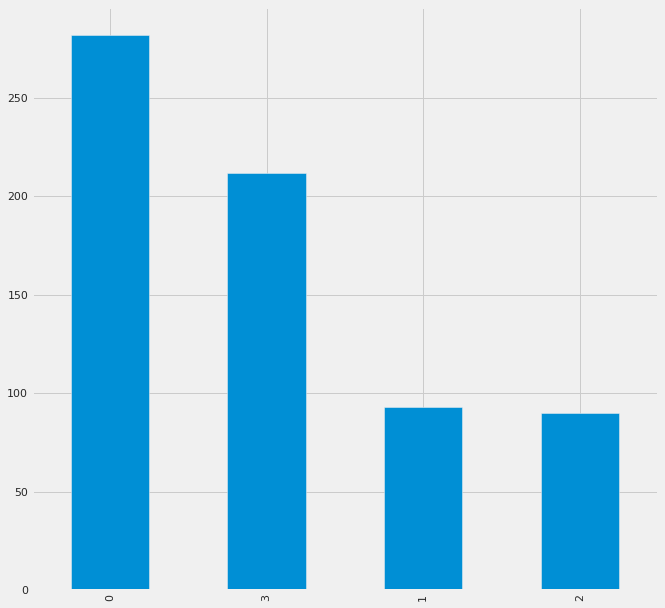

In [ ]:
kmeans_cluster_1=data_unsup_1_results['kmeans_cluster_labels'].value_counts().to_frame('kmeans_cluster_labels')
kmeans_cluster_1['porcentaje']=kmeans_cluster_1['kmeans_cluster_labels']/kmeans_cluster_1['kmeans_cluster_labels'].sum()
print(kmeans_cluster_1)
data_unsup_1_results['kmeans_cluster_labels'].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
kmeans_cluster_1.head(10)

kmeans_cluster_labels  porcentaje
0                    282    0.416544
3                    212    0.313146
1                     93    0.137371
2                     90    0.132939

#### Variables numéricas

Se creó este archivo para resultados del documento

In [ ]:
#data_unsup_1_results.groupby('kmeans_cluster_labels').describe().to_csv('k-means4EncimaMedia_df.csv', sep=';', decimal=',')

The `size` parameter has been renamed to `height`; please update your code.


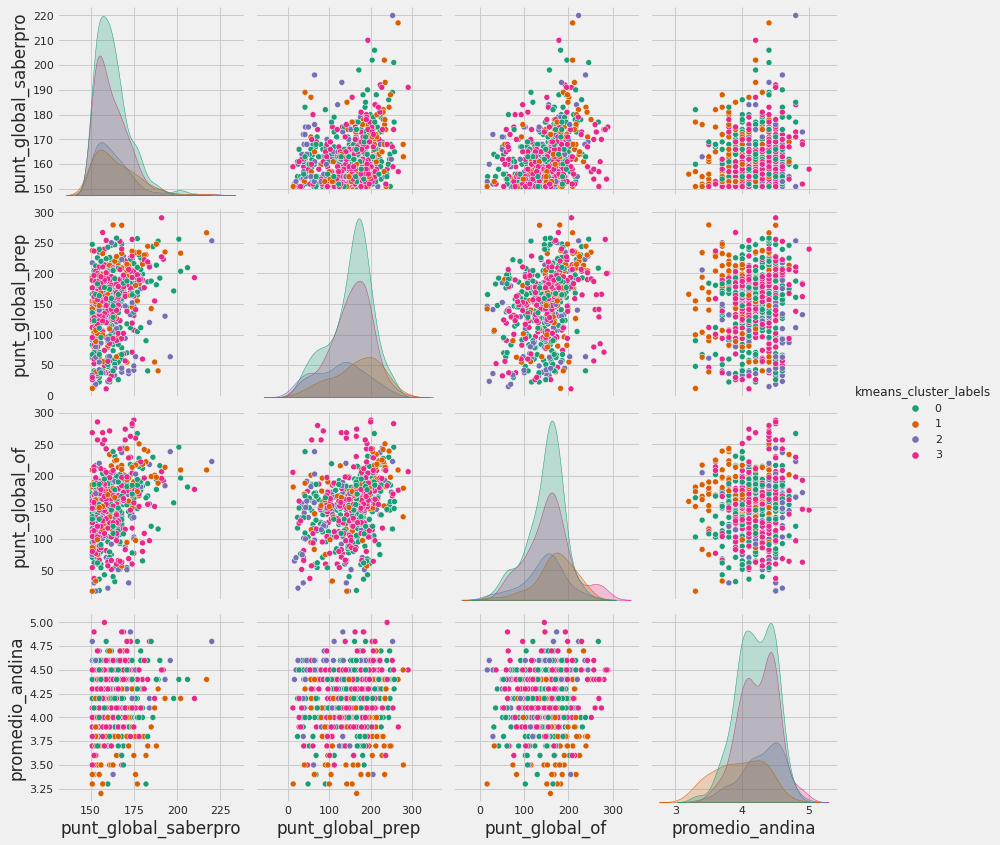

In [ ]:
sns.pairplot(data_unsup_1_results, hue='kmeans_cluster_labels', size=3, vars=['punt_global_saberpro', 'punt_global_prep', 'punt_global_of', 'promedio_andina'],kind='scatter', palette='Dark2')

#### Variables categóricas

In [ ]:
pd.crosstab(index=data_unsup_1_results['cat_edad'],columns=data_unsup_1_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0   1   2    3
cat_edad                               
18-21                   76  11   0   58
21-25                  190  80   1  141
>25                     16   2  89   13

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

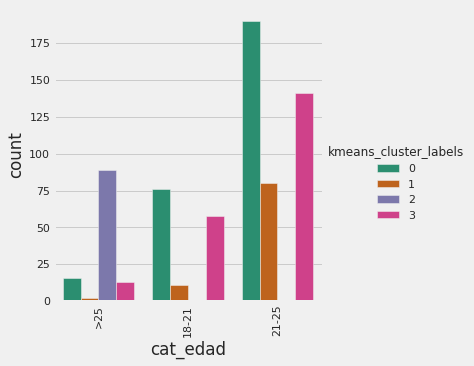

In [ ]:
sns.catplot(x="cat_edad", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["ESTU_DEPTO_RESIDE"],columns=data_unsup_1_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0   1   2    3
ESTU_DEPTO_RESIDE                      
BOGOTÁ                 247   0  51    0
CESAR                    0  81   6    0
CUNDINAMARCA            31   0  12    5
Otros                    4  10  10   45
RISARALDA                0   2  11  162

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

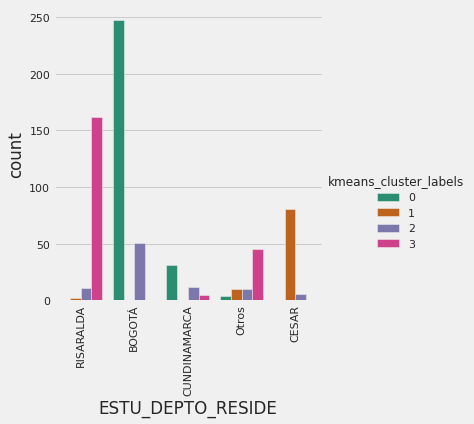

In [ ]:
sns.catplot(x="ESTU_DEPTO_RESIDE", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["ESTU_GENERO"],columns=data_unsup_1_results['kmeans_cluster_labels'])


kmeans_cluster_labels    0   1   2    3
ESTU_GENERO                            
F                      187  50  61  140
M                       95  43  29   72

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

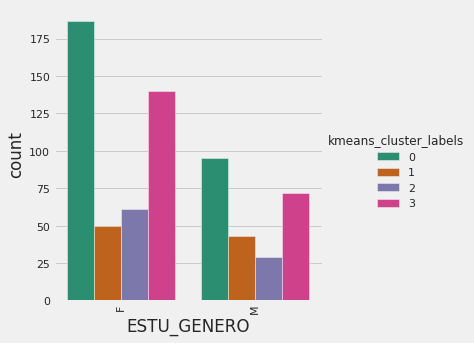

In [ ]:
sns.catplot(x="ESTU_GENERO", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["FAMI_ESTRATOVIVIENDA"],columns=data_unsup_1_results['kmeans_cluster_labels'])

kmeans_cluster_labels    0   1   2   3
FAMI_ESTRATOVIVIENDA                  
Estrato 1               17  24   8  11
Estrato 2              118  25  38  50
Estrato 3              128  27  34  92
Estrato 4                8   9   6  39
Estrato 5                5   2   2  16
Estrato 6                0   2   0   1
Sin Estrato              6   4   2   3

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

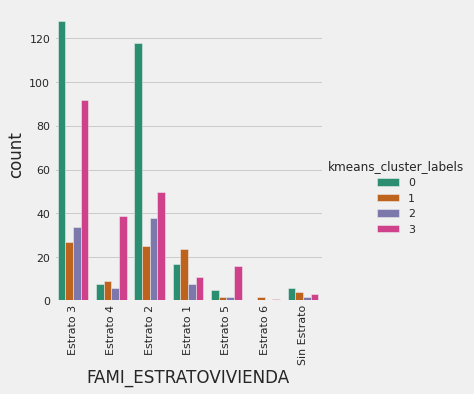

In [ ]:
sns.catplot(x="FAMI_ESTRATOVIVIENDA", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)


In [ ]:
pd.crosstab(index=data_unsup_1_results["ESTU_PRGM_ACADEMICO"],columns=data_unsup_1_results['kmeans_cluster_labels'])

kmeans_cluster_labels                        0   1   2   3
ESTU_PRGM_ACADEMICO                                       
ADMINISTRACION DE EMPRESAS                  45  12   6   1
ADMINISTRACION DE NEGOCIOS INTERNACIONALES   0   0   0  18
ADMINISTRACIÓN DE EMPRESAS                  15   0  19  13
CONTADURIA PÚBLICA                           5   0   1  22
DERECHO                                      0  18   0   0
DISEÑO GRAFICO                              12   8   1   3
ENFERMERIA                                  34   0  23  27
FISIOTERAPIA                                 0   0   1  39
INGENIERIA DE MINAS                         23   7   0   1
INGENIERÍA CIVIL                             0  24   0   0
INSTRUMENTACION QUIRURGICA                  12   0   2  16
MERCADEO Y PUBLICIDAD                       23   0   6  14
NEGOCIOS INTERNACIONALES                    35   0   0   0
OPTOMETRIA                                   7   0   6  11
Otros                                        7  23  13  21
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO      39   1   5   0
PSICOLOGIA                                  19   0   5   7
TERAPIA RESPIRATORIA                         6   0   2  19

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

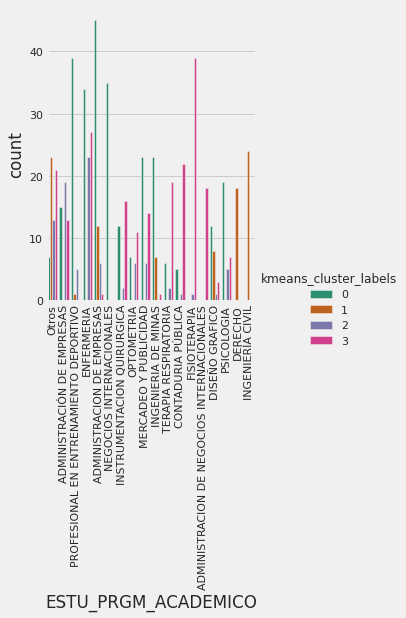

In [ ]:
sns.catplot(x="ESTU_PRGM_ACADEMICO", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["COLE_AREA_UBICACION_S11"],columns=data_unsup_1_results['kmeans_cluster_labels'])

kmeans_cluster_labels      0   1   2    3
COLE_AREA_UBICACION_S11                  
RURAL                     11   1   2   22
S.I                        0   0  85    0
URBANO                   271  92   3  190

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

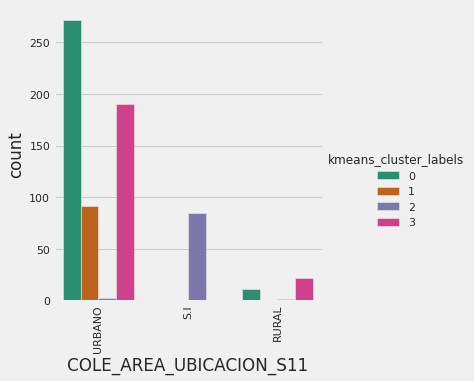

In [ ]:
sns.catplot(x="COLE_AREA_UBICACION_S11", hue='kmeans_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

El preprocesamiento de las variables categóricas mediante OneHot encoding no da buenos resultados en los algoritmos de cluster. Vease:    . Por tal motivo, se emplearán otras estrategías y modelos para abordar las variables categóricas

#### Gower Matriz de distancia

In [ ]:
#distance_matrix_1=gower.gower_matrix(data_unsup_1)

In [ ]:
'''kmeans_kwargs = {"init": "random","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(distance_matrix_1)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)'''

'kmeans_kwargs = {"init": "random","n_init": 10,\n                "max_iter": 300,\n               "random_state": 123}\nsse = []\nfor k in range(1, 11):\n  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)\n  kmeans.fit(distance_matrix_1)\n  sse.append(kmeans.inertia_)\nplt.style.use("fivethirtyeight")\nplt.plot(range(1, 11), sse)\nplt.xticks(range(1, 11))\nplt.xlabel("Número de Clusters")\nplt.ylabel("SSE")\nplt.show()\nkl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")\nprint(kl.elbow)'

### K-prototypes

In [ ]:
categoricalColumnsPosition1 = [data_unsup_1.columns.get_loc(col) for col in list(data_unsup_1.select_dtypes('object').columns)]
print('Columnas de tipo Categoría           : {}'.format(list(data_unsup_1.select_dtypes('object').columns)))
print('Posición de las Columnas Categóricas : {}'.format(categoricalColumnsPosition1))

Columnas de tipo Categoría           : ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'COLE_AREA_UBICACION_S11', 'ESTU_PRGM_ACADEMICO', 'cat_edad']
Posición de las Columnas Categóricas : [4, 5, 6, 7, 8, 10]


In [ ]:
scaled_data_unsup_1_kprototypes=data_unsup_1.copy()
scaled_data_unsup_1_kprototypes[['punt_global_prom_s11','punt_global_prep', 'punt_global_of',
                        'promedio_andina']]=standard_scaler.fit_transform(scaled_data_unsup_1_kprototypes[['punt_global_prom_s11','punt_global_prep', 'punt_global_of',
                        'promedio_andina']])
scaled_data_unsup_1_kprototypes_num=scaled_data_unsup_1_kprototypes[['punt_global_prom_s11','punt_global_prep', 'punt_global_of',
                        'promedio_andina']].copy()

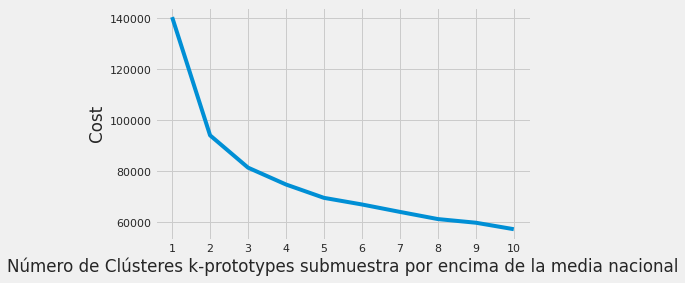

3


In [ ]:
kprototypes_kwargs = {"init": "Cao","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
cost = []
for k in range(1, 11):
  kprototypes = KPrototypes(n_jobs=-1, n_clusters=k, **kmeans_kwargs)
  kprototypes.fit(scaled_data_unsup_1_kprototypes, categorical=categoricalColumnsPosition1)
  cost.append(kprototypes.cost_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), cost)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clústeres k-prototypes submuestra por encima de la media nacional")
plt.ylabel("Cost")
plt.show()
kl = KneeLocator(range(1, 11), cost, curve="convex", direction="decreasing")
print(kl.elbow)

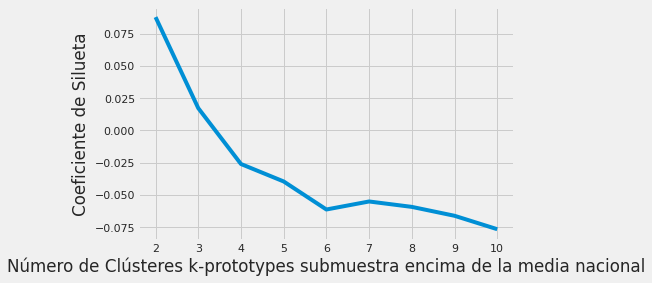

-0.0766950553254417


In [ ]:
kprototypes_kwargs = {"init": "Cao","n_init": 10,
                "max_iter": 300,
               "random_state": 123}
silhouette_coefficients = []
for k in range(2, 11):
  kprototypes = KPrototypes(n_clusters=k, n_jobs= -1,  **kprototypes_kwargs)
  kprototypes.fit(scaled_data_unsup_1_kprototypes, categorical=categoricalColumnsPosition)
  score = silhouette_score(scaled_data_unsup_1_kprototypes_num, kprototypes.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de Clústeres k-prototypes submuestra encima de la media nacional")
plt.ylabel("Coeficiente de Silueta")
plt.show()
print(score)

In [ ]:
kprototypes = KPrototypes(n_jobs=-1, n_clusters=3, init='Cao', random_state=123)
kprototypes_clusters = kprototypes.fit_predict(scaled_data_unsup_1_kprototypes, categorical=categoricalColumnsPosition1)
data_unsup_1_results['k_prototypes_cluster_labels']=kprototypes.labels_

In [ ]:
data_unsup_1_results.head()

punt_global_prom_s11  ...  k_prototypes_cluster_labels
728                  201.0  ...                            0
1645                 181.9  ...                            2
1952                 182.0  ...                            0
2102                 314.0  ...                            2
2152                 315.0  ...                            0

[5 rows x 13 columns]

In [ ]:
data_unsup_1_results['k_prototypes_cluster_labels']=data_unsup_1_results['k_prototypes_cluster_labels'].astype('object')

In [ ]:
data_unsup_1_results.to_csv('data_encima_media.csv', sep=';', index=False)

   k_prototypes_cluster_labels  porcentaje
2                          386    0.570162
0                          236    0.348597
1                           55    0.081241


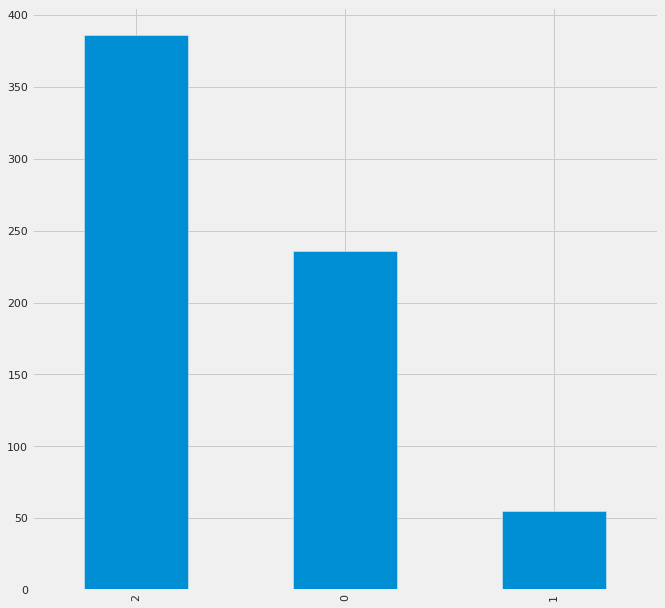

In [ ]:
kprototype_cluster_1=data_unsup_1_results['k_prototypes_cluster_labels'].value_counts().to_frame('k_prototypes_cluster_labels')
kprototype_cluster_1['porcentaje']=kprototype_cluster_1['k_prototypes_cluster_labels']/kprototype_cluster_1['k_prototypes_cluster_labels'].sum()
print(kprototype_cluster_1)
data_unsup_1_results['k_prototypes_cluster_labels'].value_counts().plot(kind='bar', figsize=(10,10))

In [ ]:
kprototype_cluster_1.head()

k_prototypes_cluster_labels  porcentaje
2                          386    0.570162
0                          236    0.348597
1                           55    0.081241

#### Variables numéricas

Se genero este archivo para resutados del documento

In [ ]:
#data_unsup_1_results.groupby('k_prototypes_cluster_labels').describe().to_csv('k-prototypes3EncimaMedia_df.csv', sep=';', decimal=',')

The `size` parameter has been renamed to `height`; please update your code.


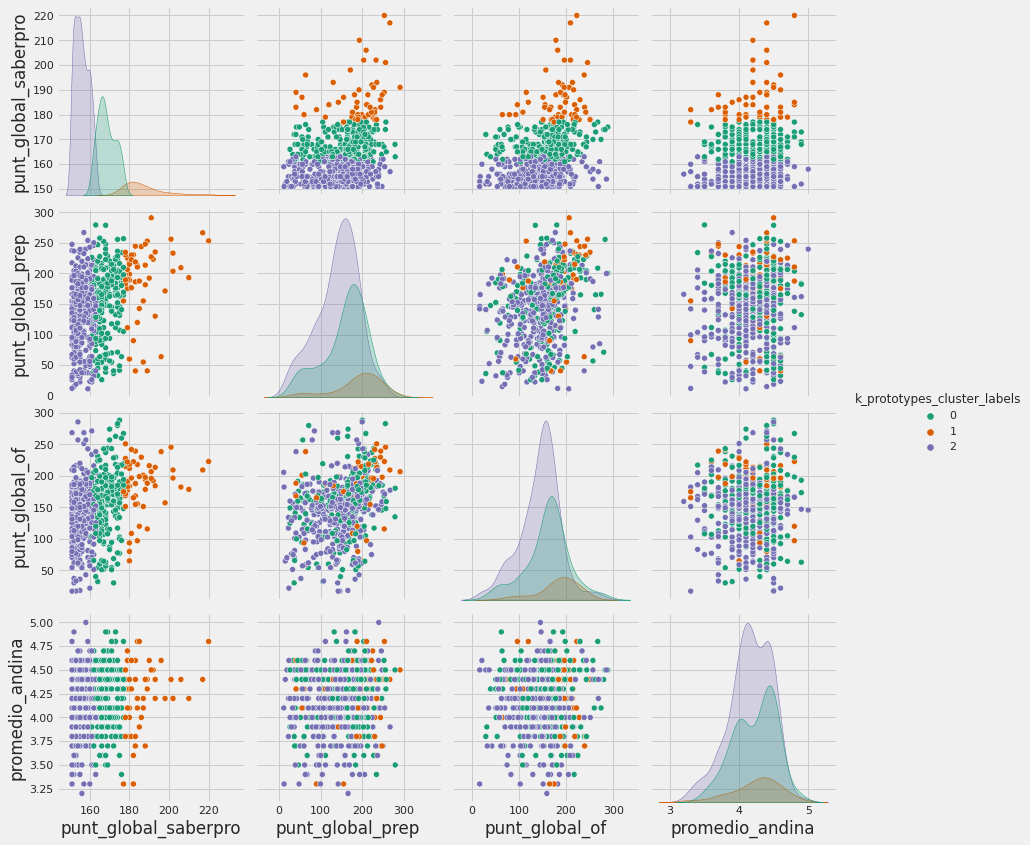

In [ ]:
sns.pairplot(data_unsup_1_results, hue='k_prototypes_cluster_labels', size=3, vars=['punt_global_saberpro', 'punt_global_prep', 'punt_global_of', 'promedio_andina'],kind='scatter', palette='Dark2')

#### Variables categóricas

In [ ]:
pd.crosstab(index=data_unsup_1_results['cat_edad'],columns=data_unsup_1_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0   1    2
cat_edad                                 
18-21                         51   7   87
21-25                        145  39  228
>25                           40   9   71

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

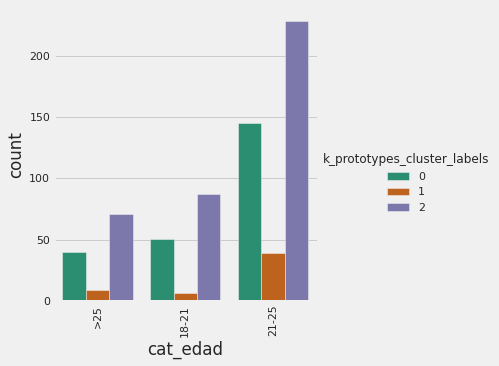

In [ ]:
sns.catplot(x="cat_edad", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["ESTU_DEPTO_RESIDE"],columns=data_unsup_1_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0   1    2
ESTU_DEPTO_RESIDE                        
BOGOTÁ                       108  21  169
CESAR                         30  12   45
CUNDINAMARCA                  17   4   27
Otros                         26   7   36
RISARALDA                     55  11  109

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

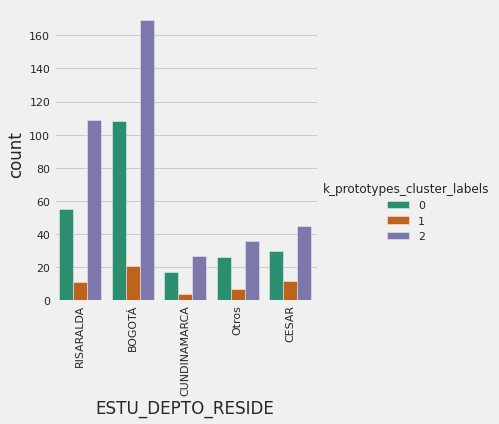

In [ ]:
sns.catplot(x="ESTU_DEPTO_RESIDE", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["ESTU_GENERO"],columns=data_unsup_1_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0   1    2
ESTU_GENERO                              
F                            144  29  265
M                             92  26  121

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

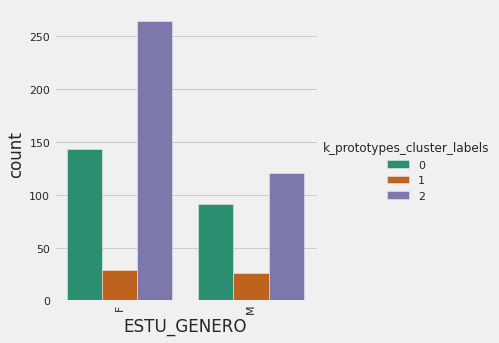

In [ ]:
sns.catplot(x="ESTU_GENERO", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["FAMI_ESTRATOVIVIENDA"],columns=data_unsup_1_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0   1    2
FAMI_ESTRATOVIVIENDA                     
Estrato 1                     16   3   41
Estrato 2                     59  18  154
Estrato 3                    124  25  132
Estrato 4                     23   6   33
Estrato 5                      9   2   14
Estrato 6                      1   0    2
Sin Estrato                    4   1   10

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

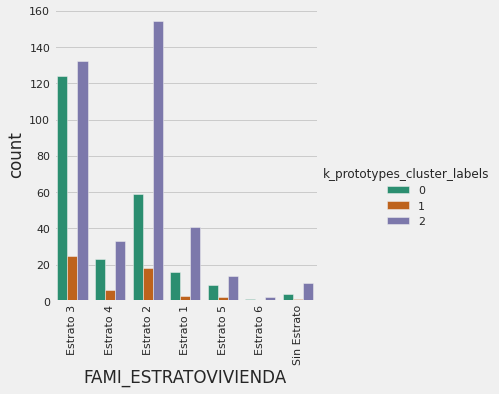

In [ ]:
sns.catplot(x="FAMI_ESTRATOVIVIENDA", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["ESTU_PRGM_ACADEMICO"],columns=data_unsup_1_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels                  0   1   2
ESTU_PRGM_ACADEMICO                                   
ADMINISTRACION DE EMPRESAS                  19   1  44
ADMINISTRACION DE NEGOCIOS INTERNACIONALES   8   2   8
ADMINISTRACIÓN DE EMPRESAS                  15   5  27
CONTADURIA PÚBLICA                          11   1  16
DERECHO                                      6   1  11
DISEÑO GRAFICO                              11   2  11
ENFERMERIA                                  26   2  56
FISIOTERAPIA                                10   0  30
INGENIERIA DE MINAS                         10   6  15
INGENIERÍA CIVIL                            11   4   9
INSTRUMENTACION QUIRURGICA                   8   1  21
MERCADEO Y PUBLICIDAD                        9   8  26
NEGOCIOS INTERNACIONALES                    19   3  13
OPTOMETRIA                                  12   5   7
Otros                                       21  11  32
PROFESIONAL EN ENTRENAMIENTO DEPORTIVO      18   0  27
PSICOLOGIA                                  16   2  13
TERAPIA RESPIRATORIA                         6   1  20

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

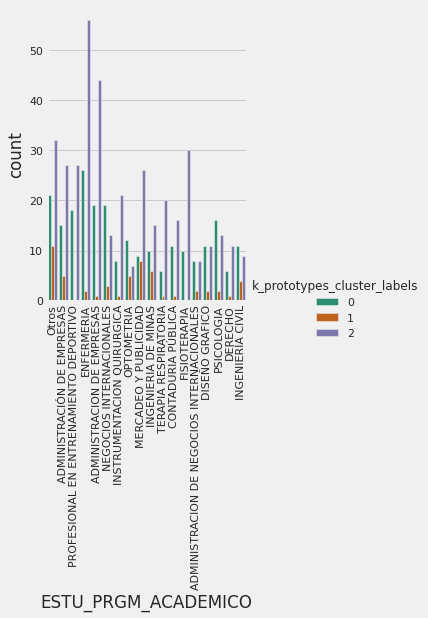

In [ ]:
sns.catplot(x="ESTU_PRGM_ACADEMICO", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

In [ ]:
pd.crosstab(index=data_unsup_1_results["COLE_AREA_UBICACION_S11"],columns=data_unsup_1_results['k_prototypes_cluster_labels'])

k_prototypes_cluster_labels    0   1    2
COLE_AREA_UBICACION_S11                  
RURAL                          8   7   21
S.I                           27   6   52
URBANO                       201  42  313

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

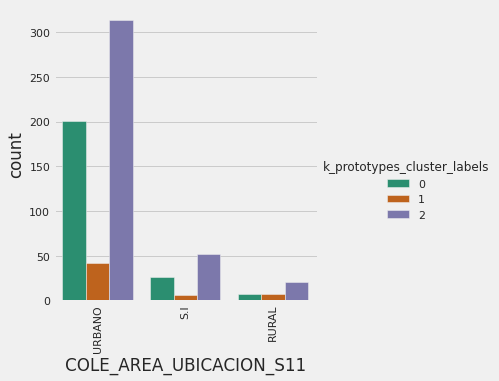

In [ ]:
sns.catplot(x="COLE_AREA_UBICACION_S11", hue='k_prototypes_cluster_labels',  kind="count", data=data_unsup_1_results, palette='Dark2')
plt.xticks( rotation=90)

Se genera archivo con las etiquetas de Cluster dada por ambos algoritmos para la submuestra por debajo de la media nacional

In [ ]:
unsup_file_name_2='cluster_encima_media.csv'

In [ ]:
data_unsup_1_results.to_csv(os.path.join(path, unsup_file_name_2), sep=';', index=False)